In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Diccionario de zonas horarias
timezone_dict = {
    'ar': 'Asia/Riyadh',
    'de': 'Europe/Berlin',
    'hu': 'Europe/Budapest',
    'zh': 'Asia/Shanghai',
    'es': 'Europe/Madrid',
    'fr': 'Europe/Paris',
    'vi': 'Asia/Ho_Chi_Minh',
    'ru': 'Europe/Moscow',
    'ja': 'Asia/Tokyo',
    'it': 'Europe/Rome',
    'pt': 'America/Sao_Paulo'
}

# Diccionario de traducción
translation_dict = {
    'arte': 'art',
    'deporte': 'sports',
    'derecho': 'rights',
    'eventos': 'events',
    'filosofia': 'philosophy',
    'geografia': 'geography',
    'historia': 'history',
    'juegos': 'games',
    'matematica': 'mathematics',
    'naturaleza': 'nature',
    'politica': 'politics',
    'salud': 'health',
    'desportos': 'sports',
    'direito': 'rights',
    'jogos': 'games',
    'natureza': 'nature',
    'religiao': 'religion',
    'saude': 'health'
}

directory = 'converted'  # Asegúrate de que el directorio es correcto
language_activities = {}  # Diccionario para guardar las actividades de cada idioma
language_dates = {}  # Diccionario para guardar las fechas inicial y final de cada idioma

# Loop a través de cada archivo en el directorio
for file in os.listdir(directory):
    if file.startswith('df_'):
        language = file.split('_')[1].split('.')[0]  # Extrae el idioma del nombre del archivo
        print('Reading File:', file)
        
        # Cargar el dataframe
        path = os.path.join(directory, file)
        df = pd.read_pickle(path)

         # Convertir 'datetime' a objetos datetime
        if language == 'pt':
            df['datetime'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ', utc=True)
        else:
            df['datetime'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
        
        # Convertir la hora a la zona horaria del idioma
        df['datetime'] = df['datetime'].dt.tz_convert(timezone_dict[language])

        # Convertir 'datetime' a objetos datetime
        df['datetime'] = pd.to_datetime(df['datetime'])
        df['day_of_week'] = df['datetime'].dt.dayofweek
        df['hour'] = df['datetime'].dt.hour

        # Explode en la columna 'categories' para separar las categorías
        df = df.explode('categories')

        # Traducir las categorías usando el diccionario de traducción
        df['categories'] = df['categories'].map(translation_dict).fillna(df['categories'])

        # Obtener la fecha mínima y máxima
        min_date = df['datetime'].min()
        max_date = df['datetime'].max()
        language_dates[language] = {'start_date': min_date, 'end_date': max_date}

        # Agrupar por categoría, día de la semana y hora, y contar las ediciones
        category_activity = df.groupby(['categories', 'day_of_week', 'hour']).size().unstack(level=0, fill_value=0)

        # Almacenar la actividad por categoría en el diccionario
        if language not in language_activities:
            language_activities[language] = {}
        for category in category_activity.columns:
            if category not in language_activities[language]:
                language_activities[language][category] = category_activity[category]

# Imprimir las fechas inicial y final de cada idioma
for language, dates in language_dates.items():
    print(f"Language: {language}, Start Date: {dates['start_date']}, End Date: {dates['end_date']}")

Reading File: df_ar
Reading File: df_de
Reading File: df_hu
Reading File: df_zh
Reading File: df_pt
Reading File: df_es
Reading File: df_fr
Reading File: df_vi
Reading File: df_ru
Reading File: df_ja
Reading File: df_it
Language: ar, Start Date: 2003-07-11 03:23:02+03:00, End Date: 2010-03-28 02:57:37+03:00
Language: de, Start Date: 2001-04-02 20:27:41+02:00, End Date: 2010-03-28 00:59:41+01:00
Language: hu, Start Date: 2003-07-09 06:41:24+02:00, End Date: 2010-11-07 05:03:38+01:00
Language: zh, Start Date: 2002-10-31 01:19:19+08:00, End Date: 2010-03-28 07:58:03+08:00
Language: pt, Start Date: 2001-06-17 14:13:19-03:00, End Date: 2011-10-25 02:51:22-02:00
Language: es, Start Date: 2001-05-25 11:53:55+02:00, End Date: 2010-10-23 16:25:54+02:00
Language: fr, Start Date: 2001-08-04 11:49:16+02:00, End Date: 2010-03-28 00:59:35+01:00
Language: vi, Start Date: 2002-11-16 21:54:24+07:00, End Date: 2010-03-28 06:56:21+07:00
Language: ru, Start Date: 2002-11-13 21:48:05+03:00, End Date: 2010-

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Diccionario de zonas horarias
timezone_dict = {
    'ar': 'Asia/Riyadh',
    'de': 'Europe/Berlin',
    'hu': 'Europe/Budapest',
    'zh': 'Asia/Shanghai',
    'es': 'Europe/Madrid',
    'fr': 'Europe/Paris',
    'vi': 'Asia/Ho_Chi_Minh',
    'ru': 'Europe/Moscow',
    'ja': 'Asia/Tokyo',
    'it': 'Europe/Rome',
    'pt': 'Europe/Lisbon'  # Cambio realizado aquí
}

# Diccionario de traducción
translation_dict = {
    'arte': 'art',
    'deporte': 'sports',
    'derecho': 'rights',
    'eventos': 'events',
    'filosofia': 'philosophy',
    'geografia': 'geography',
    'historia': 'history',
    'juegos': 'games',
    'matematica': 'mathematics',
    'naturaleza': 'nature',
    'politica': 'politics',
    'salud': 'health',
    'desportos': 'sports',
    'direito': 'rights',
    'jogos': 'games',
    'natureza': 'nature',
    'religiao': 'religion',
    'saude': 'health'
}

directory = 'converted'  # Asegúrate de que el directorio es correcto
language_activities = {}  # Diccionario para guardar las actividades de cada idioma

# Loop a través de cada archivo en el directorio
for file in os.listdir(directory):
    if file.startswith('df_'):
        language = file.split('_')[1].split('.')[0]  # Extrae el idioma del nombre del archivo
        print('Reading File:', file)
        
        # Cargar el dataframe
        path = os.path.join(directory, file)
        df = pd.read_pickle(path)

        # Convertir 'datetime' a objetos datetime
        if language == 'pt':
            df['datetime'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ', utc=True)
        else:
            df['datetime'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
        
        # Convertir la hora a la zona horaria del idioma
        df['datetime'] = df['datetime'].dt.tz_convert(timezone_dict[language])

        # Convertir 'datetime' a objetos datetime
        df['datetime'] = pd.to_datetime(df['datetime'])
        df['day_of_week'] = df['datetime'].dt.dayofweek
        df['hour'] = df['datetime'].dt.hour

        # Explode en la columna 'categories' para separar las categorías
        df = df.explode('categories')

        # Traducir las categorías usando el diccionario de traducción
        df['categories'] = df['categories'].map(translation_dict).fillna(df['categories'])

        # Filtrar las categorías para eliminar 'food'
                # Filtrar las categorías para eliminar 'food'
        df = df[df['categories'] != 'foods']

        # Agrupar por categoría, día de la semana y hora, y contar las ediciones
        category_activity = df.groupby(['categories', 'day_of_week', 'hour']).size().unstack(level=0, fill_value=0)

        # Almacenar la actividad por categoría en el diccionario
        if language not in language_activities:
            language_activities[language] = {}
        for category in category_activity.columns:
            if category != 'foods':  # Filtrar aquí también para asegurarse
                if category not in language_activities[language]:
                    language_activities[language][category] = category_activity[category]

Reading File: df_ar
Reading File: df_de
Reading File: df_hu
Reading File: df_zh
Reading File: df_pt
Reading File: df_es
Reading File: df_fr
Reading File: df_vi
Reading File: df_ru
Reading File: df_ja
Reading File: df_it


In [30]:
import pickle
# Guardar el diccionario en un archivo pickle
with open('language_activities.pkl', 'wb') as f:
    pickle.dump(language_activities, f)

print('language_activities guardado en language_activities.pkl')

language_activities guardado en language_activities.pkl


In [2]:
import pickle
with open('language_activities.pkl', 'rb') as x:
    language_editors = pickle.load(x)

print("El diccionario language_activities ha sido cargado correctamente.")


El diccionario language_activities ha sido cargado correctamente.


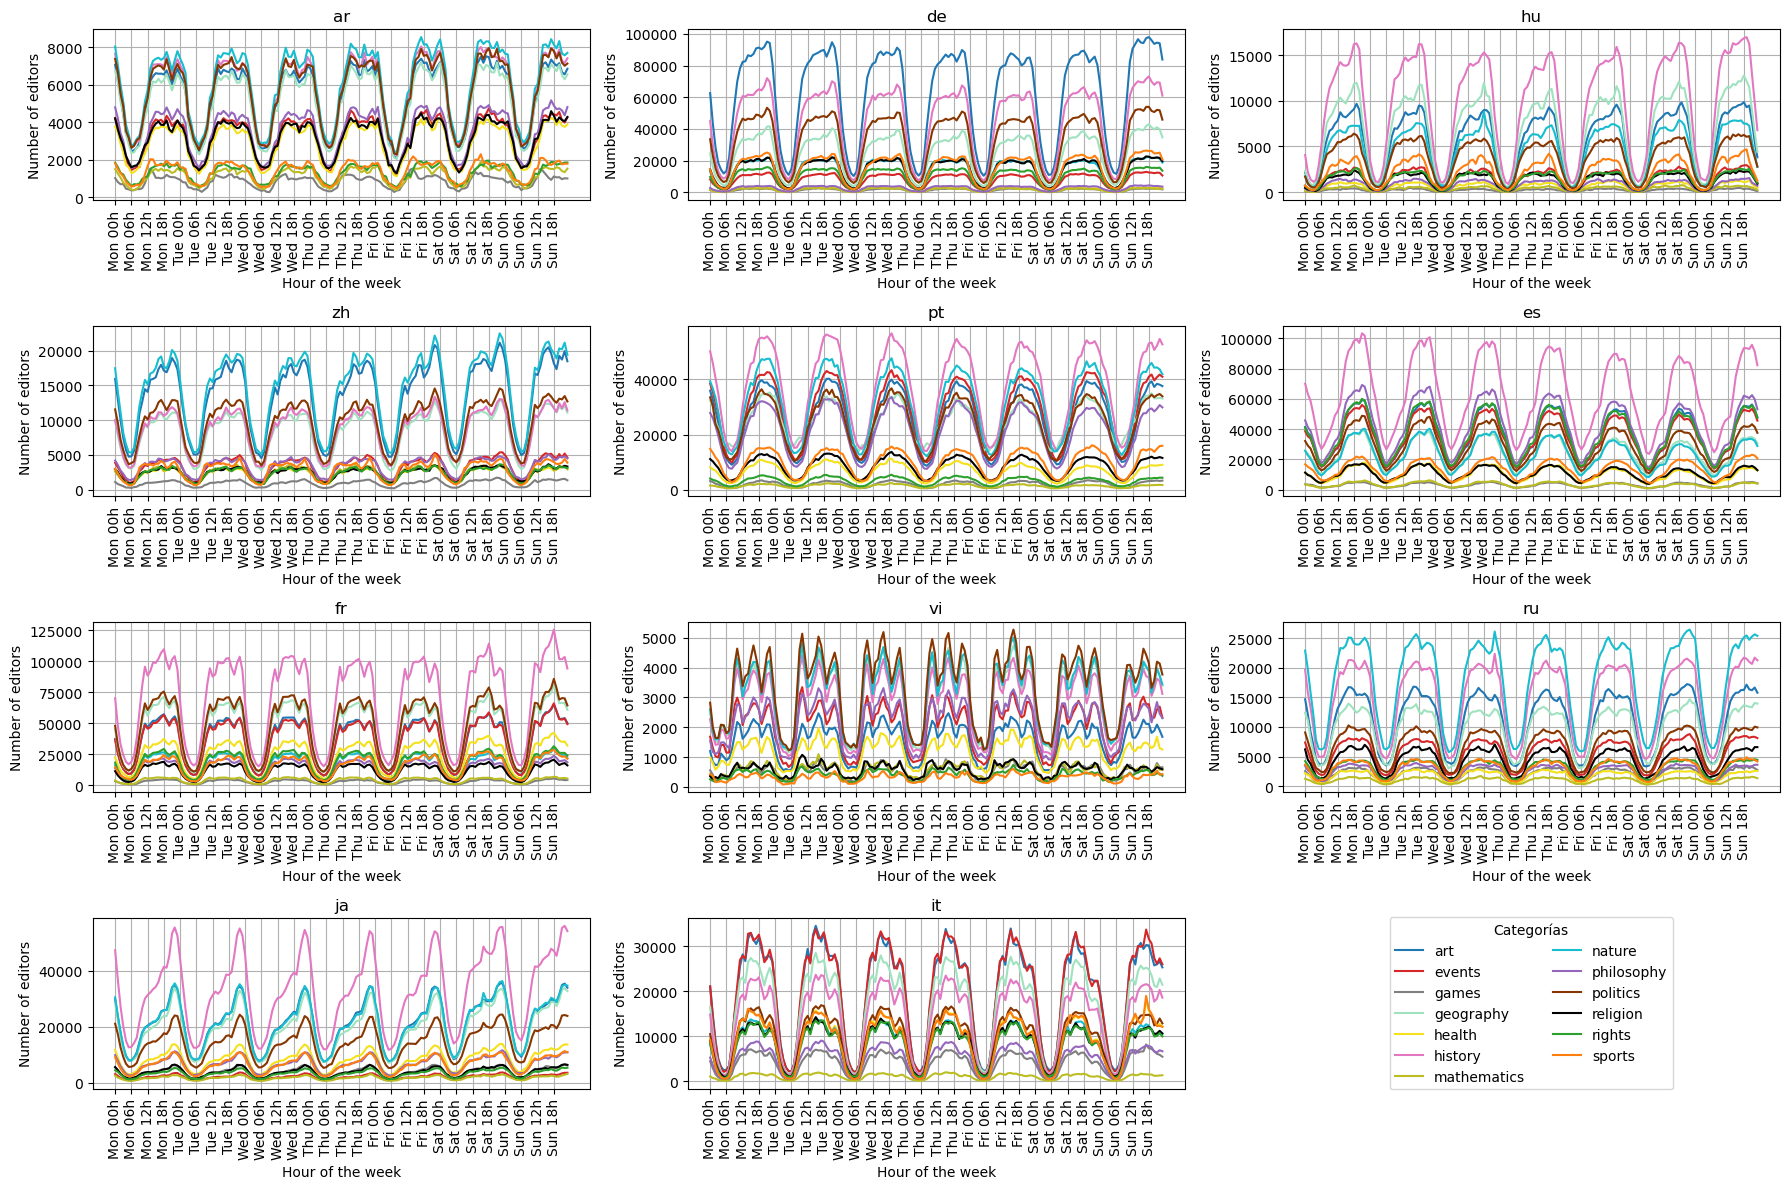

In [32]:
# Diccionario de zonas horarias
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
timezone_dict = {
    'ar': 'Asia/Riyadh',
    'de': 'Europe/Berlin',
    'hu': 'Europe/Budapest',
    'zh': 'Asia/Shanghai',
    'es': 'Europe/Madrid',
    'fr': 'Europe/Paris',
    'vi': 'Asia/Ho_Chi_Minh',
    'ru': 'Europe/Moscow',
    'ja': 'Asia/Tokyo',
    'it': 'Europe/Rome',
    'pt': 'Europe/Lisbon'  # Cambio realizado aquí
}

# Diccionario de traducción
translation_dict = {
    'arte': 'art',
    'deporte': 'sports',
    'derecho': 'rights',
    'eventos': 'events',
    'filosofia': 'philosophy',
    'geografia': 'geography',
    'historia': 'history',
    'juegos': 'games',
    'matematica': 'mathematics',
    'naturaleza': 'nature',
    'politica': 'politics',
    'salud': 'health',
    'desportos': 'sports',
    'direito': 'rights',
    'jogos': 'games',
    'natureza': 'nature',
    'religiao': 'religion',
    'saude': 'health'
}

# Diccionario de colores para cada categoría
# Diccionario de colores para cada categoría
color_dict = {
    'art': '#1f77b4',        # Azul
    'sports': '#ff7f0e',     # Naranja
    'rights': '#2ca02c',     # Verde
    'events': '#d62728',     # Rojo
    'philosophy': '#9467bd', # Púrpura
    'geography': '#9FE2BF',  # Marrón
    'history': '#e377c2',    # Rosa
    'games': '#7f7f7f',      # Gris
    'mathematics': '#bcbd22',# Oliva
    'nature': '#17becf',     # Cian
    'politics': '#873600',   # Cafe obscuro
    'health': '#F5E11B',     # Amarillo
    'religion': '#000000',   # Negro
}
# Crear una figura con subplots de 4x3
fig, axes = plt.subplots(4, 3, figsize=(18, 12))

# Iterar sobre los idiomas y crear los gráficos
for i, (language, categories) in enumerate(language_activities.items()):
    ax = axes.flat[i]
    for category, activity in categories.items():
        hours_extended = np.tile(np.arange(24), 7) + np.repeat(np.arange(7) * 24, 24)
        edits = activity.values.flatten()
        ax.plot(hours_extended, edits, linestyle='-', color=color_dict.get(category, 'black'), label=category)
    ax.set_title(f'{language}')
    ax.set_xlabel('Hour of the week')
    ax.set_ylabel('Number of editors')
    ax.grid(True)
    ax.set_xticks(np.arange(0, 7*24, 6))
    ax.set_xticklabels([f'{d} {h:02d}h' for d in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] for h in range(0, 24, 6)], rotation=90)

# Ocultar el último subplot (11 idiomas = 12 subplots, uno estará vacío)
axes.flat[-1].axis('off')

# Agregar la leyenda en el subplot vacío
handles, labels = ax.get_legend_handles_labels()
axes.flat[-1].legend(handles, labels, loc='center', title='Categorías', ncol=2)

# Ajustar el diseño
plt.tight_layout()
plt.show()

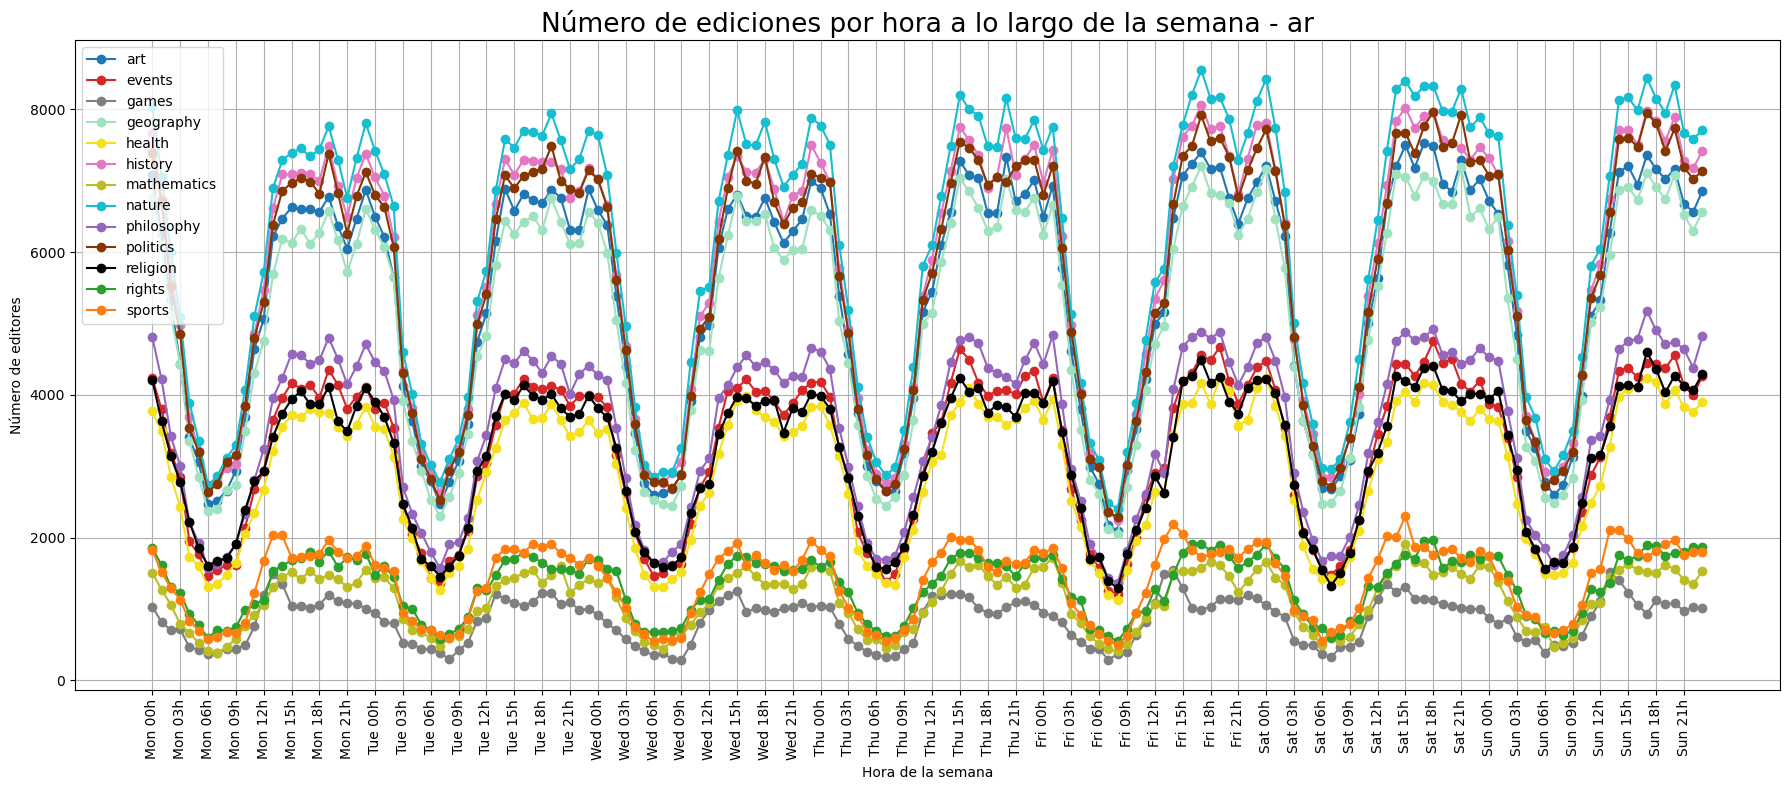

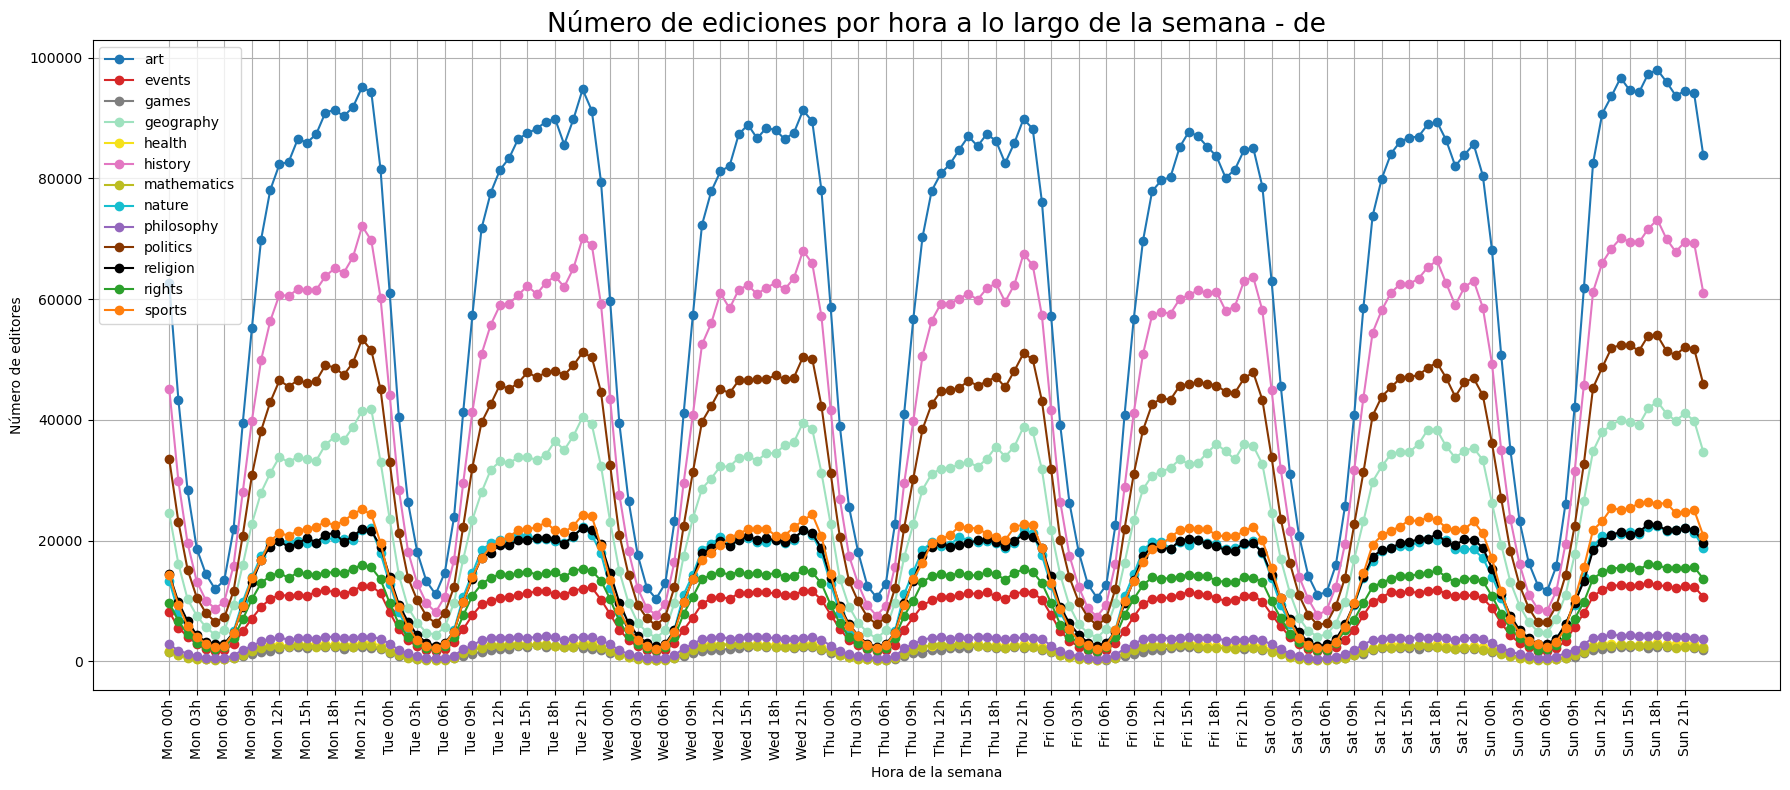

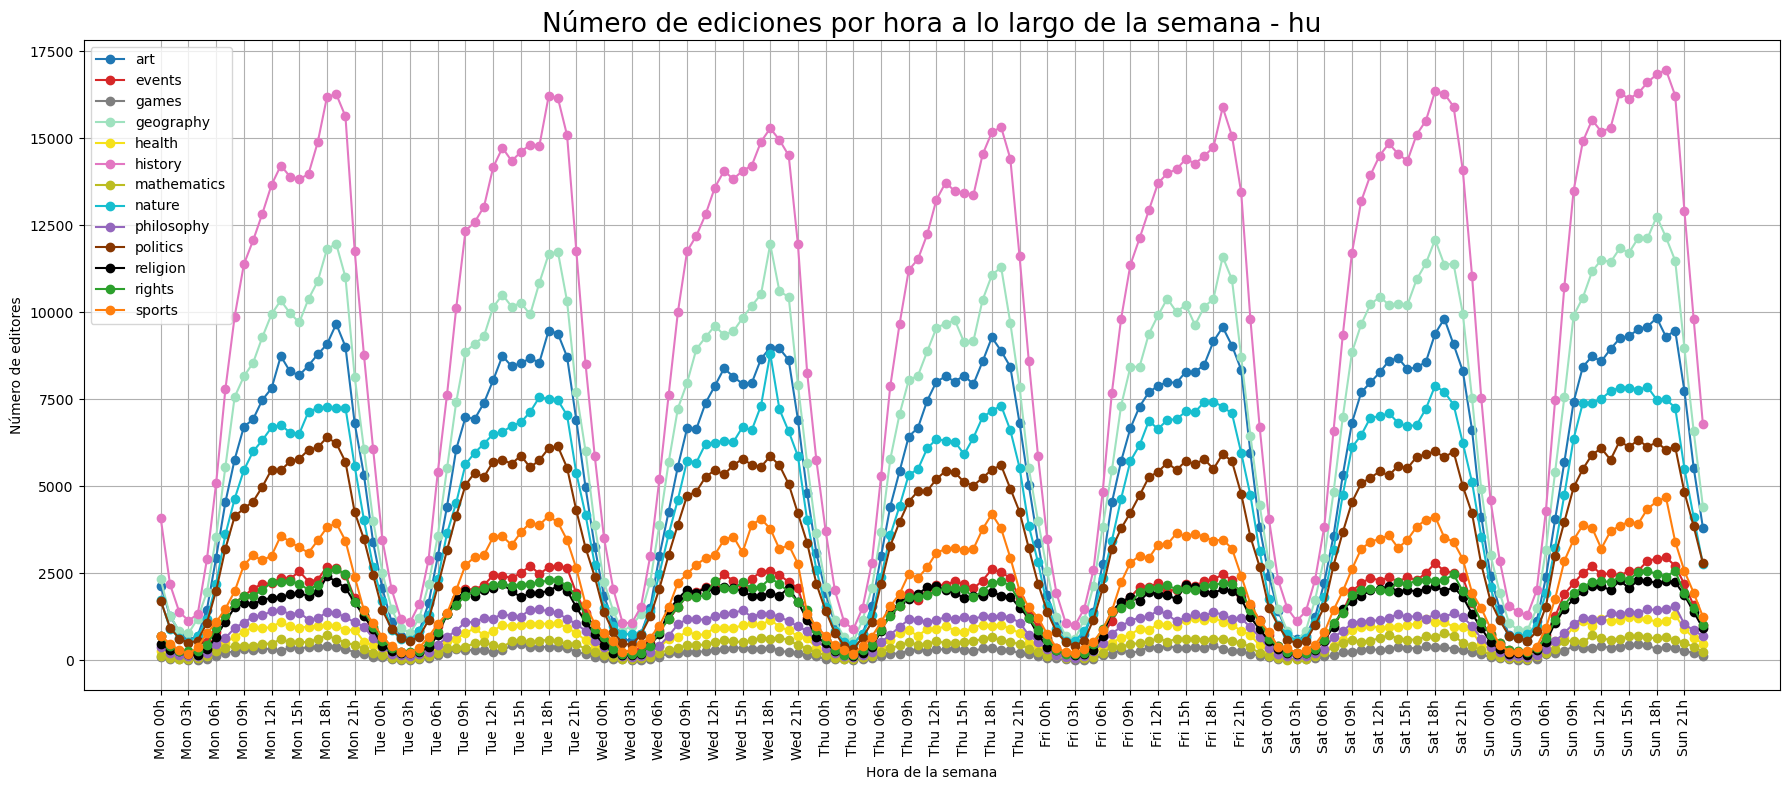

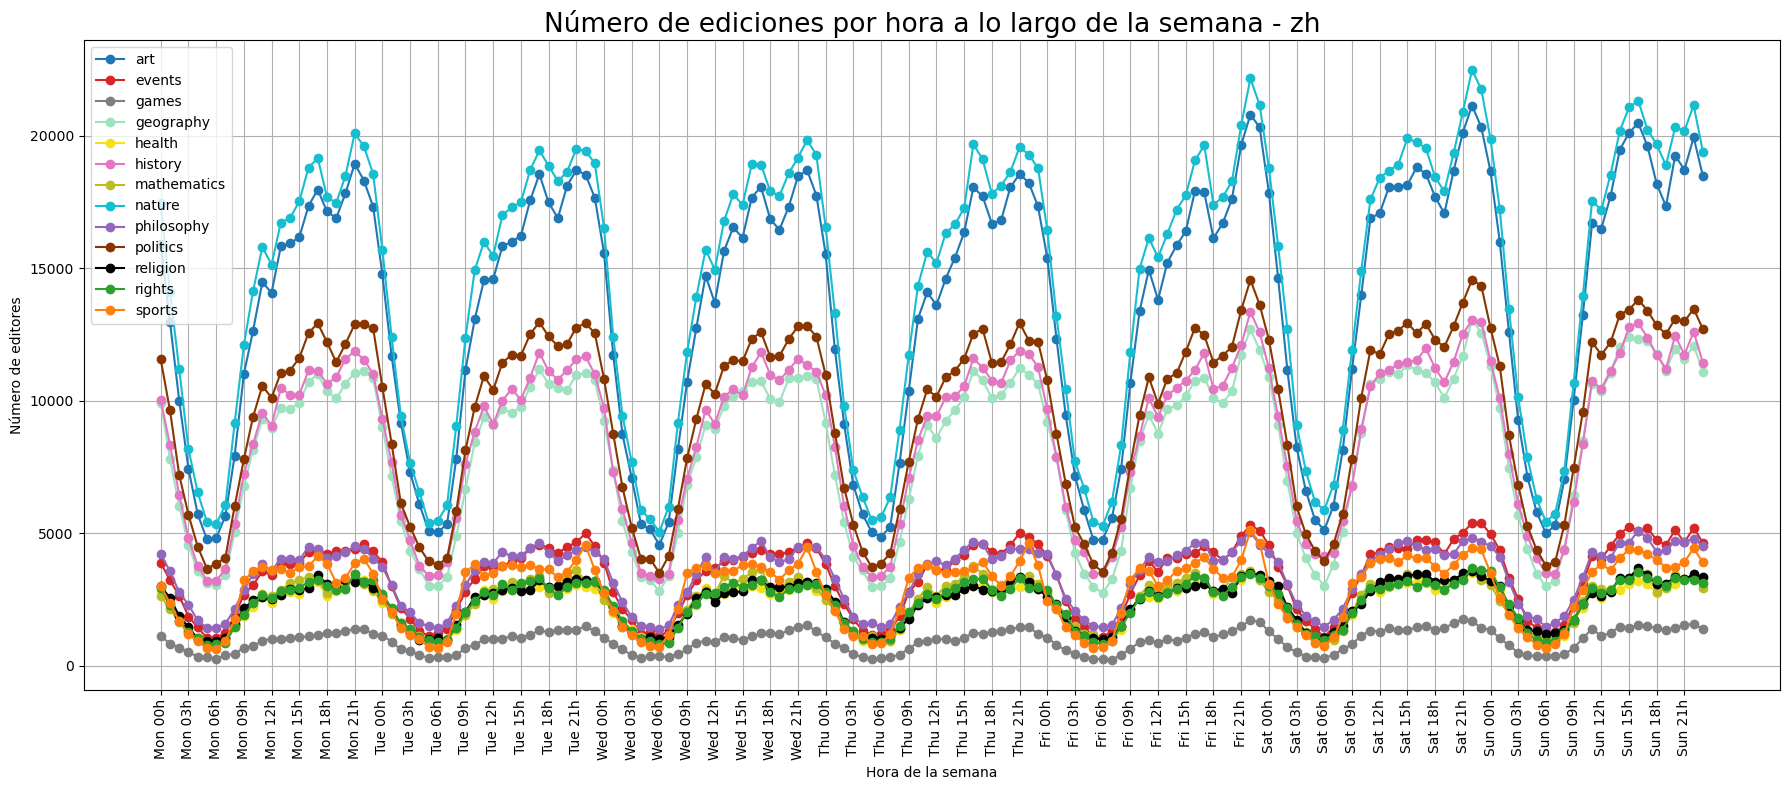

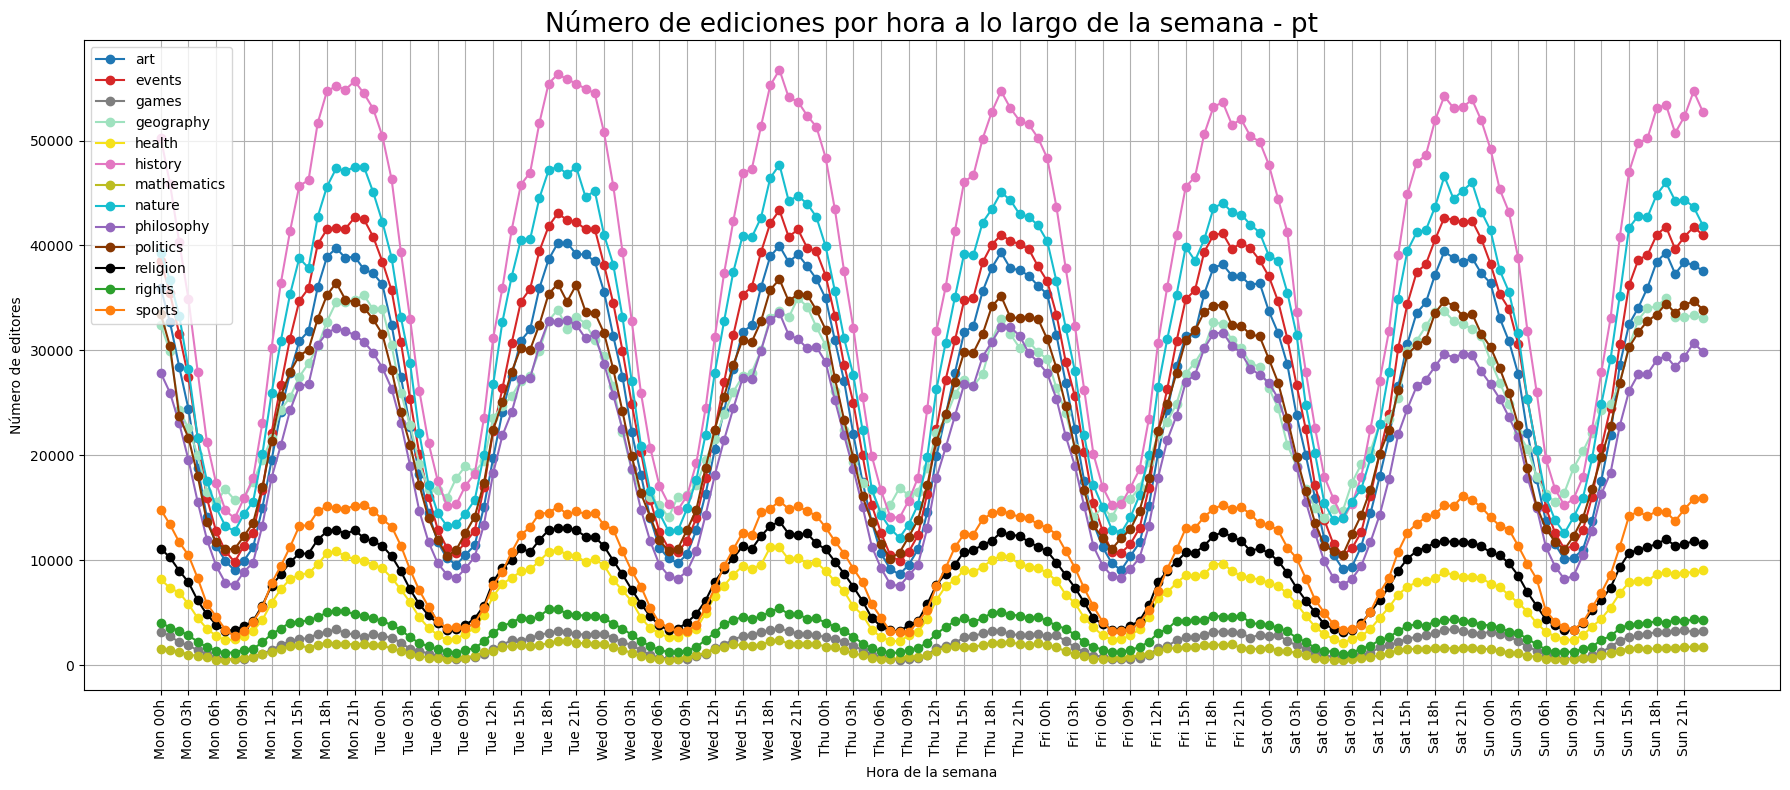

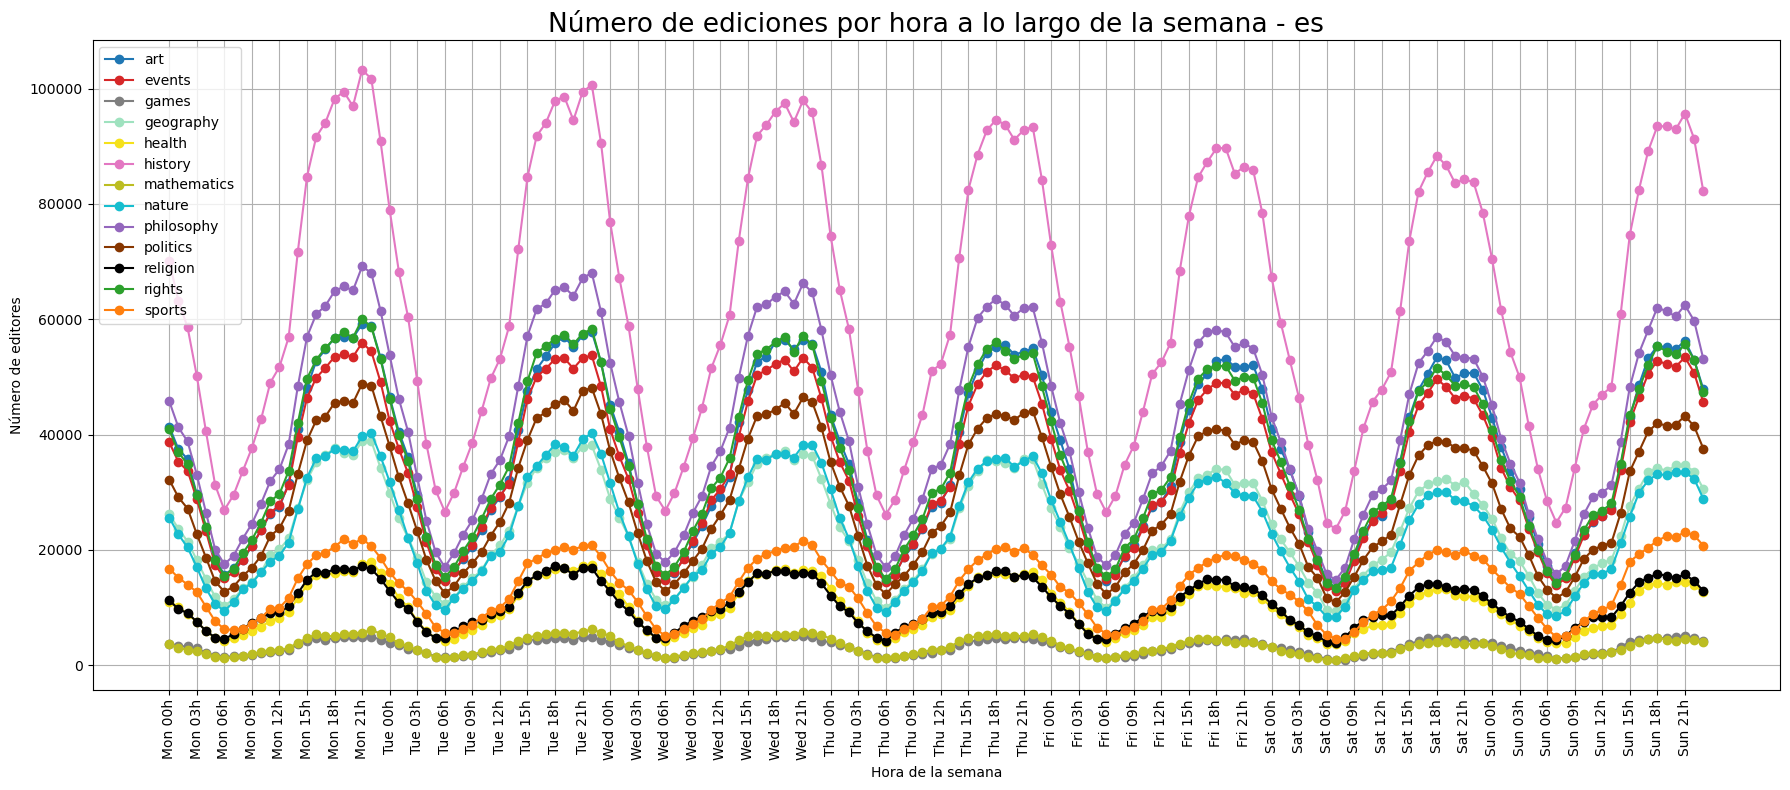

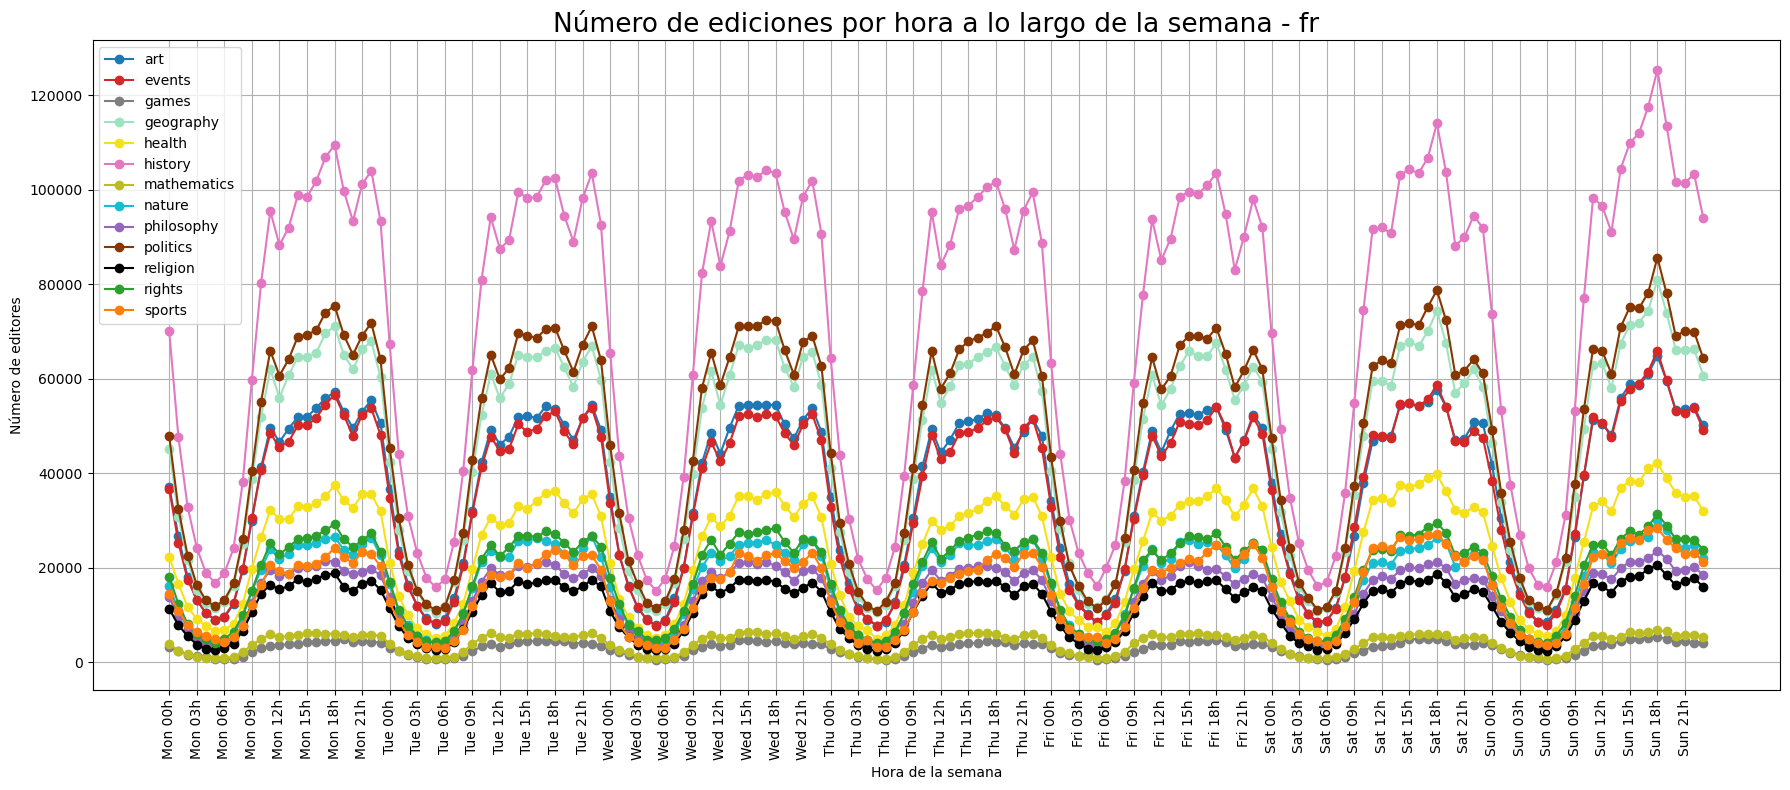

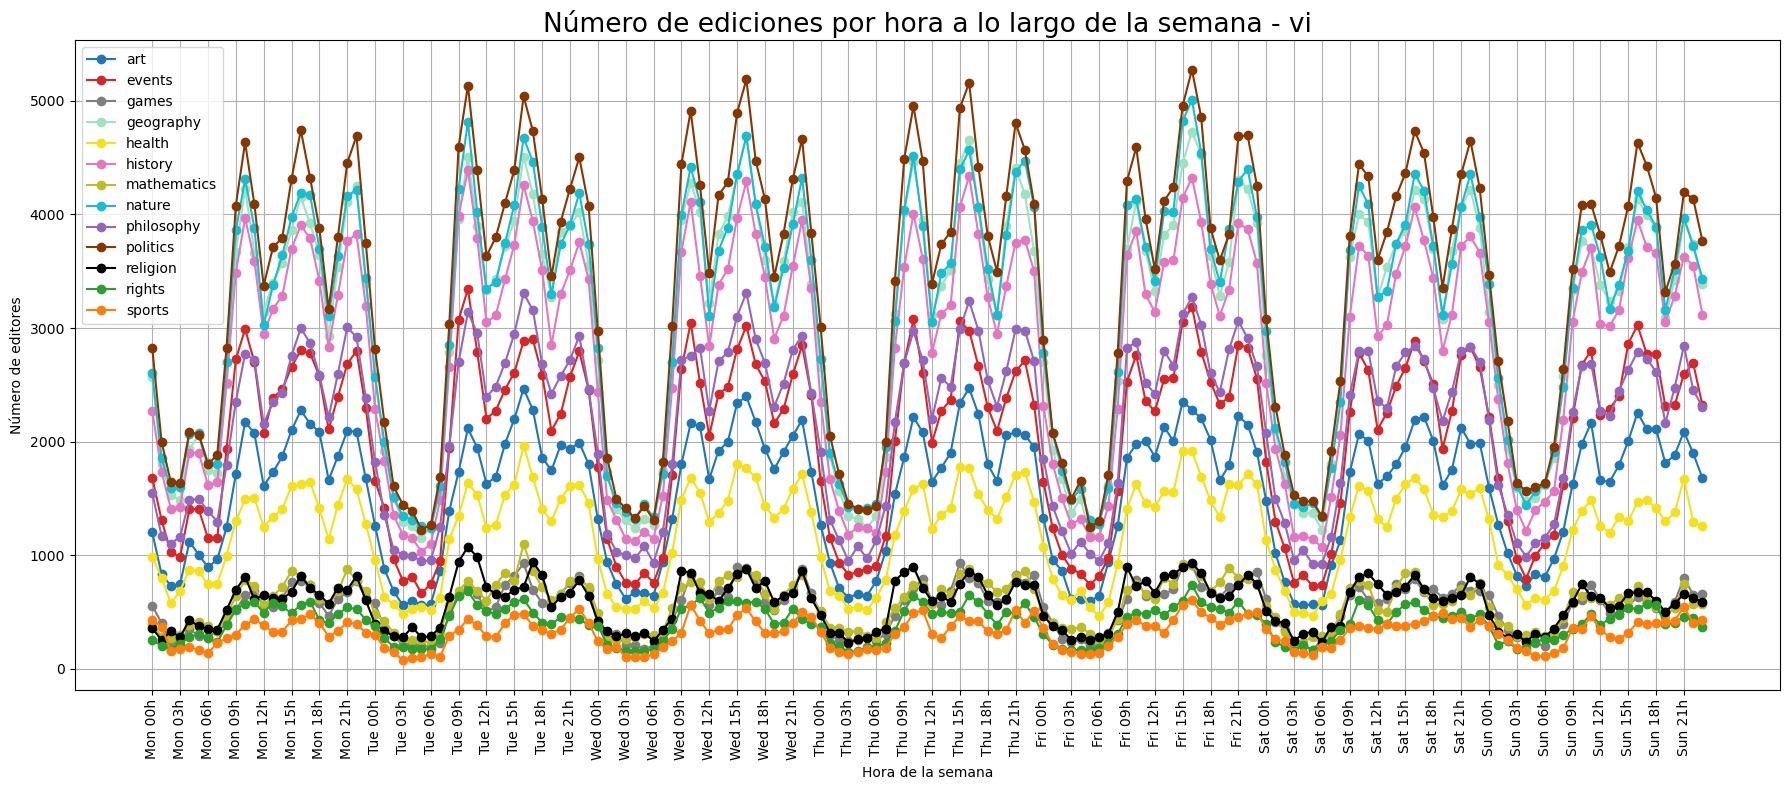

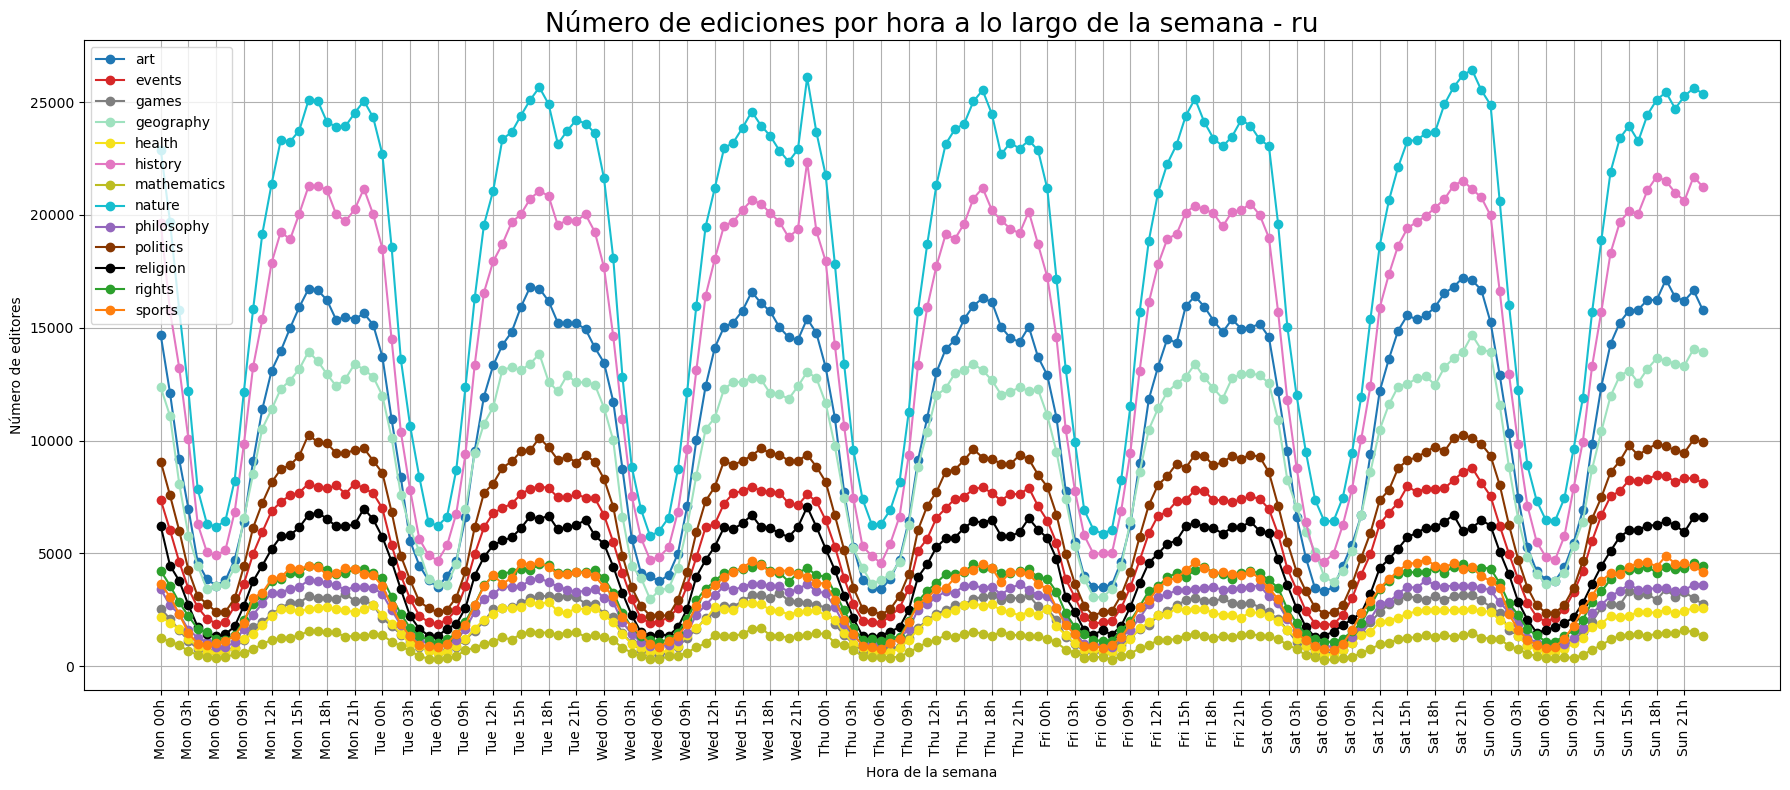

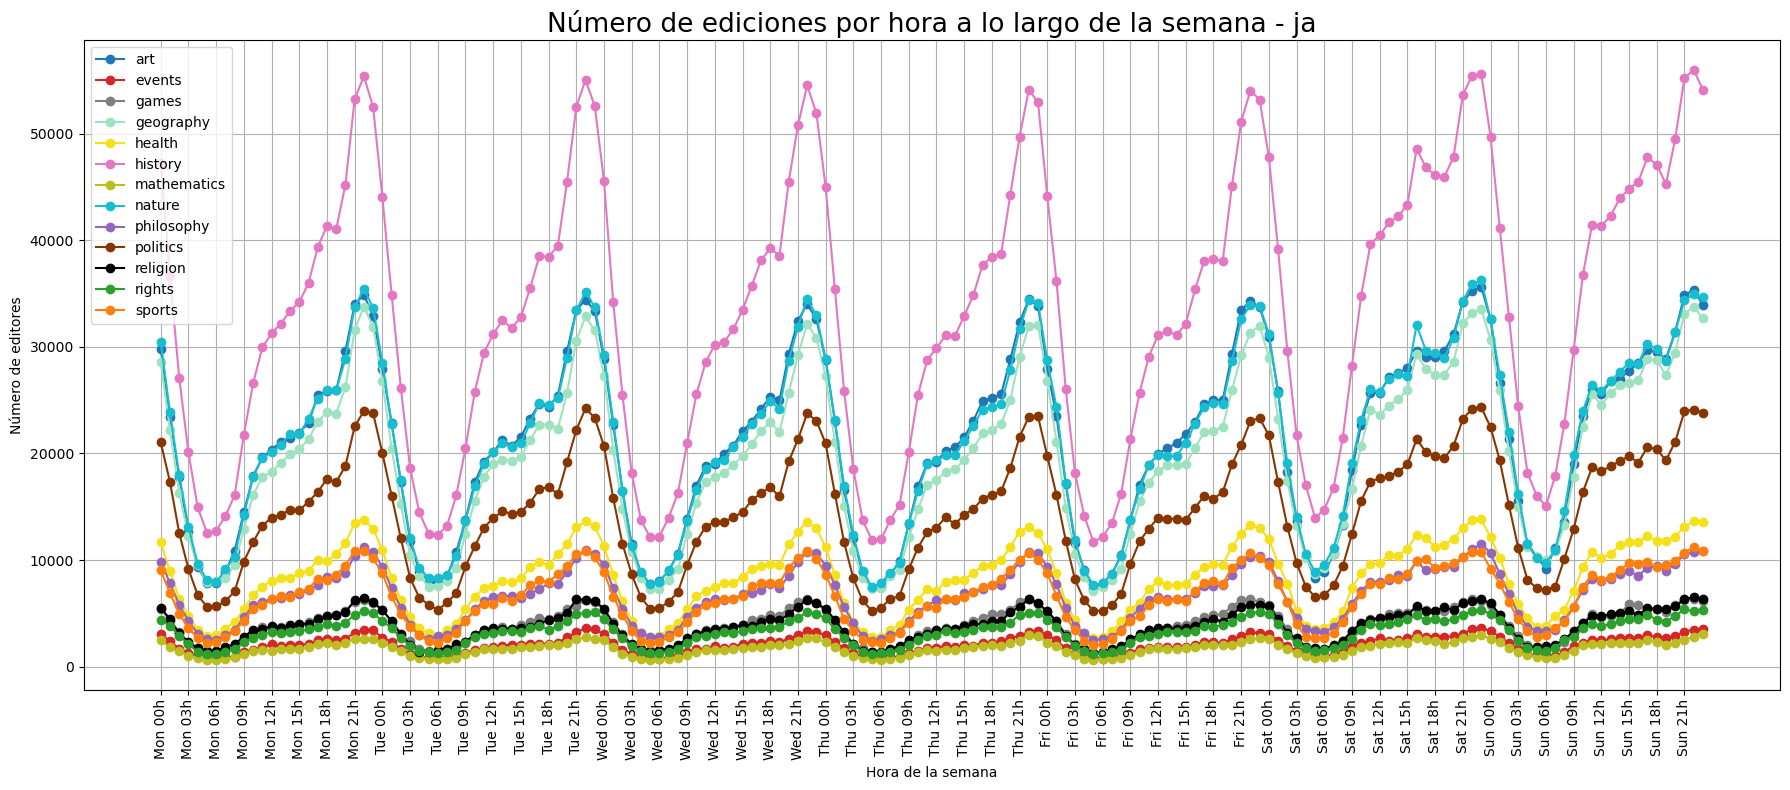

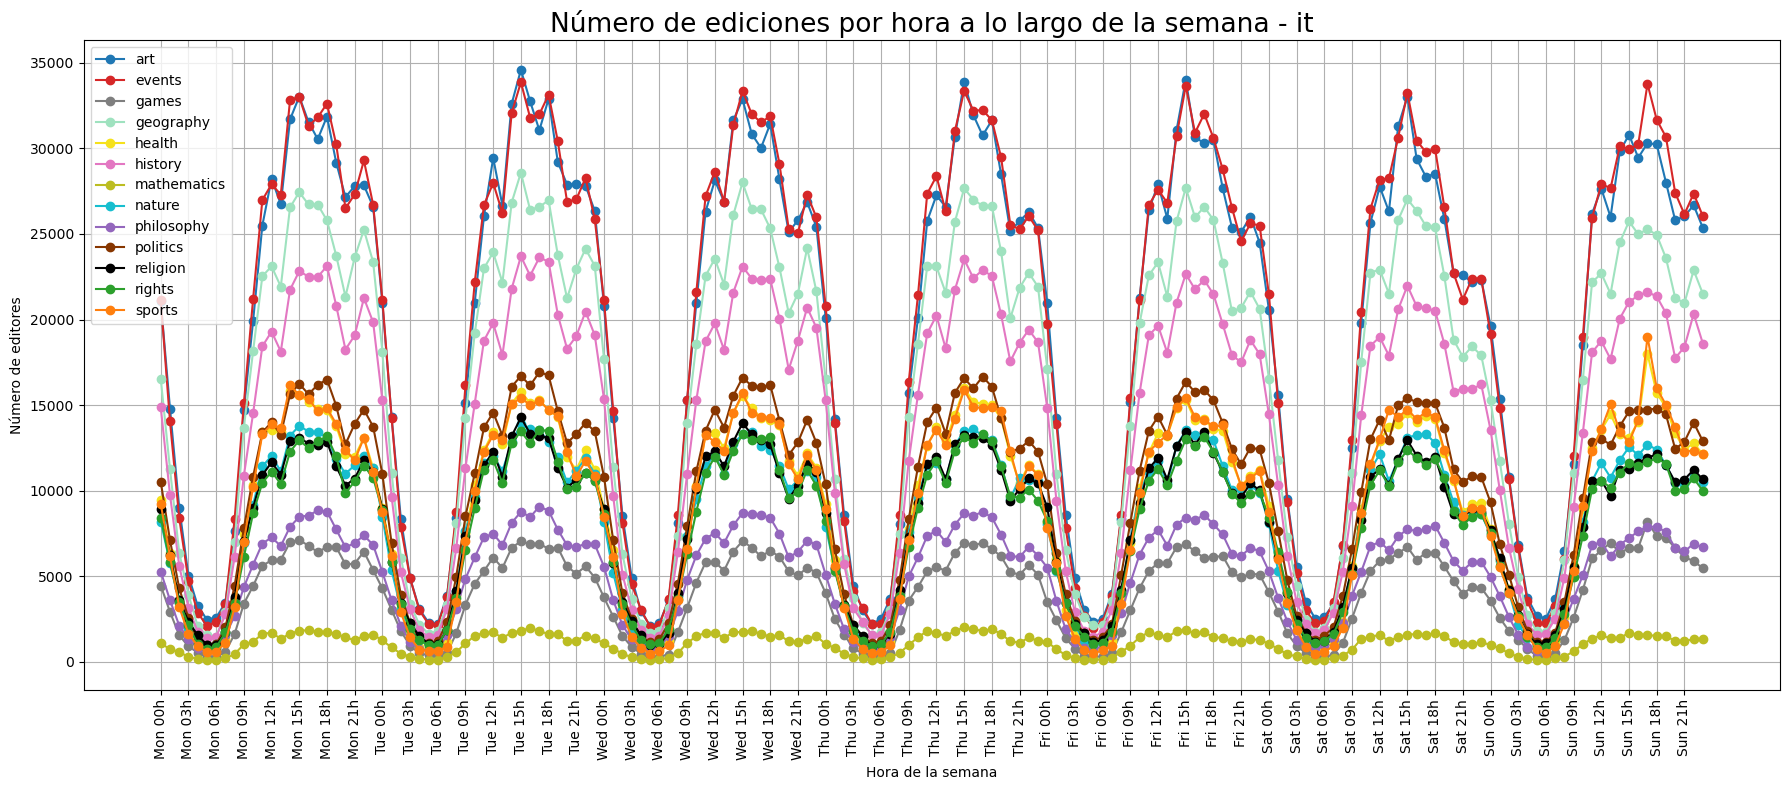

In [31]:


# Crear gráficos por cada idioma
for language, categories in language_activities.items():
    plt.figure(figsize=(18, 8))
    for category, activity in categories.items():
        hours_extended = np.tile(np.arange(24), 7) + np.repeat(np.arange(7) * 24, 24)
        edits = activity.values.flatten()
        plt.plot(hours_extended, edits, marker='o', linestyle='-', color=color_dict.get(category, 'black'), label=category)

    plt.title(f'Número de ediciones por hora a lo largo de la semana - {language}',fontsize=19)
    plt.xlabel('Hora de la semana')
    plt.ylabel('Número de editores')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(0, 7*24, 3), [f'{d} {h:02d}h' for d in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] for h in range(0, 24, 3)], rotation=90)
    plt.tight_layout()
    plt.show()


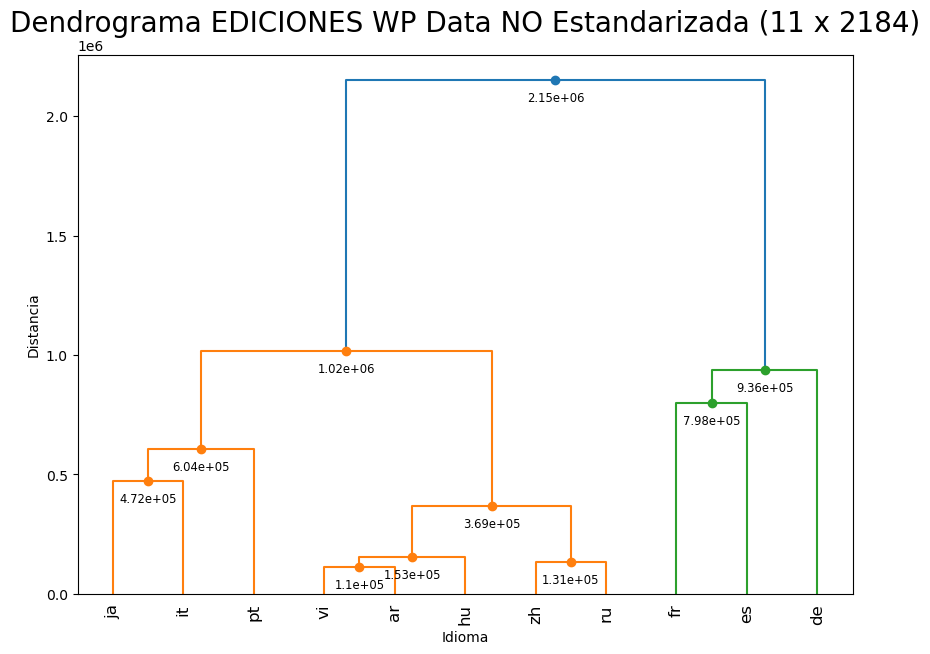

In [36]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


data_scaled = data_pivot

# Realizar la clusterización jerárquica
linked = linkage(data_scaled, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = data_pivot.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma EDICIONES WP Data NO Estandarizada (11 x 2184)',fontsize=20)
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
plt.savefig('ediciones/dendrogram1.png')
plt.show()


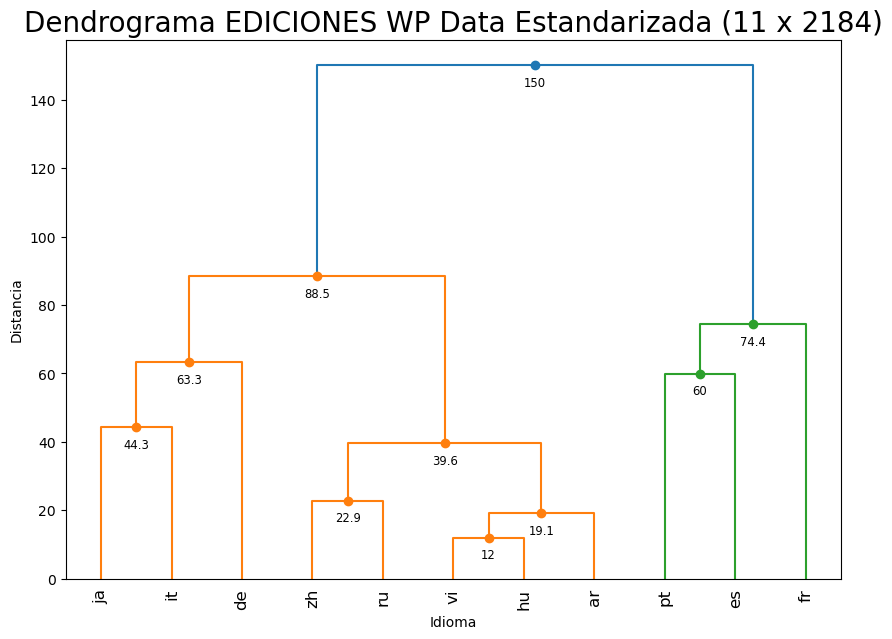

In [34]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Diccionario de números para cada categoría
category_dict = {
    'art': 1,
    'events': 2,
    'games': 3,
    'geography': 4,
    'health': 5,
    'history': 6,
    'mathematics': 7,
    'nature': 8,
    'philosophy': 9,
    'politics': 10,
    'religion': 11,
    'rights': 12,
    'sports': 13
}


data_list = []
for language, categories_data in language_editors.items():
    for category, activity in categories_data.items():
        category_number = category_dict[category]
        for (day_of_week, hour), edits in activity.items():
            # Crear una columna que represente la hora de la semana
            week_hour = day_of_week * 24 + hour
            data_list.append([language, category_number, week_hour, edits])

data = pd.DataFrame(data_list, columns=['language', 'category', 'week_hour', 'editors'])

# Pivotar el DataFrame para que cada hora de la semana sea una columna y cada fila sea una combinación de idioma y categoría
data_pivot = data.pivot_table(index=['language'], columns=['week_hour', 'category'], values='editors', fill_value=0)

# Normalizar los datos utilizando z-score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pivot)
#data_scaled = data_pivot

# Realizar la clusterización jerárquica
linked = linkage(data_scaled, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = data_pivot.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma EDICIONES WP Data Estandarizada (11 x 2184)',fontsize=20)
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
plt.savefig('ediciones/dendrogram2.png')
plt.show()


In [23]:
data_list = []
for language, categories_data in language_editors.items():
    for category, activity in categories_data.items():
        category_number = category_dict[category]
        for (day_of_week, hour), edits in activity.items():
            hour_of_day = hour  # Mantener solo la hora del día
            data_list.append([language, category_number, hour_of_day, edits])

data = pd.DataFrame(data_list, columns=['language', 'category', 'hour_of_day', 'edits'])

# Pivotar el DataFrame para que cada hora del día sea una columna y cada fila sea una combinación de idioma y categoría
data_pivot = data.pivot_table(index=['language'], columns=['hour_of_day', 'category'], values='edits', fill_value=0)

# Opcional: normalizar los datos utilizando z-score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pivot)
data_scaled = pd.DataFrame(data_scaled, index=data_pivot.index, columns=data_pivot.columns)

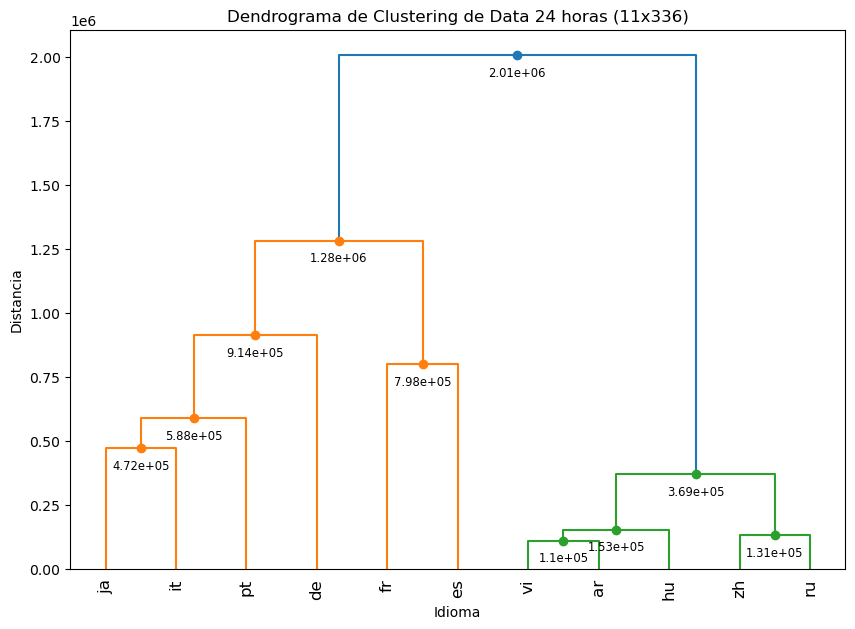

In [24]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Diccionario de números para cada categoría
category_dict = {
    'art': 1,
    'events': 2,
    'foods': 3,
    'games': 4,
    'geography': 5,
    'health': 6,
    'history': 7,
    'mathematics': 8,
    'nature': 9,
    'philosophy': 10,
    'politics': 11,
    'religion': 12,
    'rights': 13,
    'sports': 14
}


data_list = []
for language, categories_data in language_editors.items():
    for category, activity in categories_data.items():
        category_number = category_dict[category]
        for (day_of_week, hour), edits in activity.items():
            # Crear una columna que represente la hora de la semana
            week_hour = day_of_week * 24 + hour
            data_list.append([language, category_number, week_hour, edits])

data = pd.DataFrame(data_list, columns=['language', 'category', 'week_hour', 'edits'])

# Pivotar el DataFrame para que cada hora de la semana sea una columna y cada fila sea una combinación de idioma y categoría
data_pivot = data.pivot_table(index=['language'], columns=['week_hour', 'category'], values='edits', fill_value=0)

# Normalizar los datos utilizando z-score
scaler = StandardScaler()
data_scaled = data_pivot

# Realizar la clusterización jerárquica
linked = linkage(data_scaled, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = data_pivot.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma de Clustering de Data 24 horas (11x336)')
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
plt.savefig('ediciones/dendrogram3.png')
plt.show()


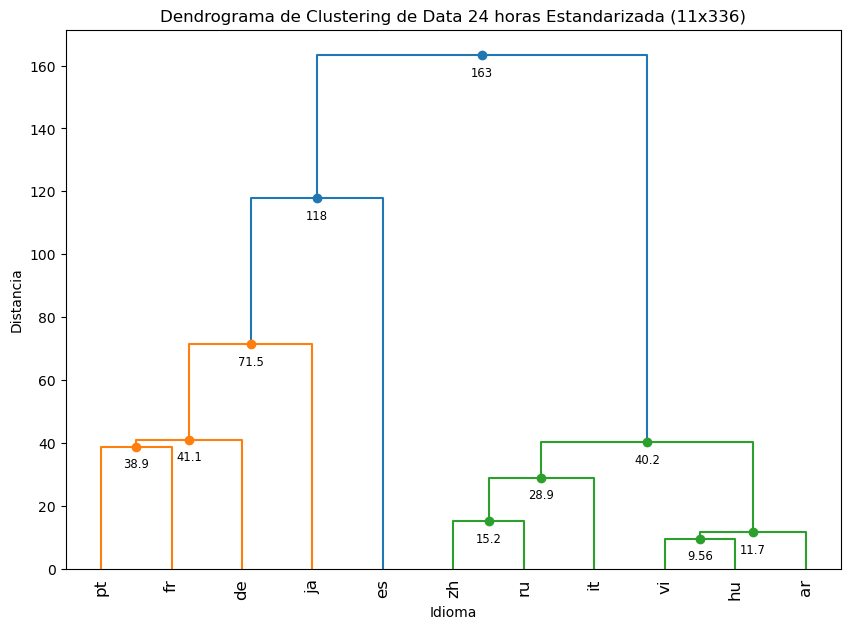

In [34]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Diccionario de números para cada categoría
category_dict = {
    'art': 1,
    'events': 2,
    'foods': 3,
    'games': 4,
    'geography': 5,
    'health': 6,
    'history': 7,
    'mathematics': 8,
    'nature': 9,
    'philosophy': 10,
    'politics': 11,
    'religion': 12,
    'rights': 13,
    'sports': 14
}


data_list = []
for language, categories_data in language_editors.items():
    for category, activity in categories_data.items():
        category_number = category_dict[category]
        for (day_of_week, hour), edits in activity.items():
            # Crear una columna que represente la hora de la semana
            week_hour = day_of_week * 24 + hour
            data_list.append([language, category_number, week_hour, edits])

data = pd.DataFrame(data_list, columns=['language', 'category', 'week_hour', 'edits'])

# Pivotar el DataFrame para que cada hora de la semana sea una columna y cada fila sea una combinación de idioma y categoría
data_pivot = data.pivot_table(index=['language'], columns=['week_hour', 'category'], values='edits', fill_value=0)

# Normalizar los datos utilizando z-score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pivot)

# Realizar la clusterización jerárquica
linked = linkage(data_scaled, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = data_pivot.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma de Clustering de Data 24 horas Estandarizada (11x336)')
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
plt.savefig('editores/dendrogram4.png')
plt.show()


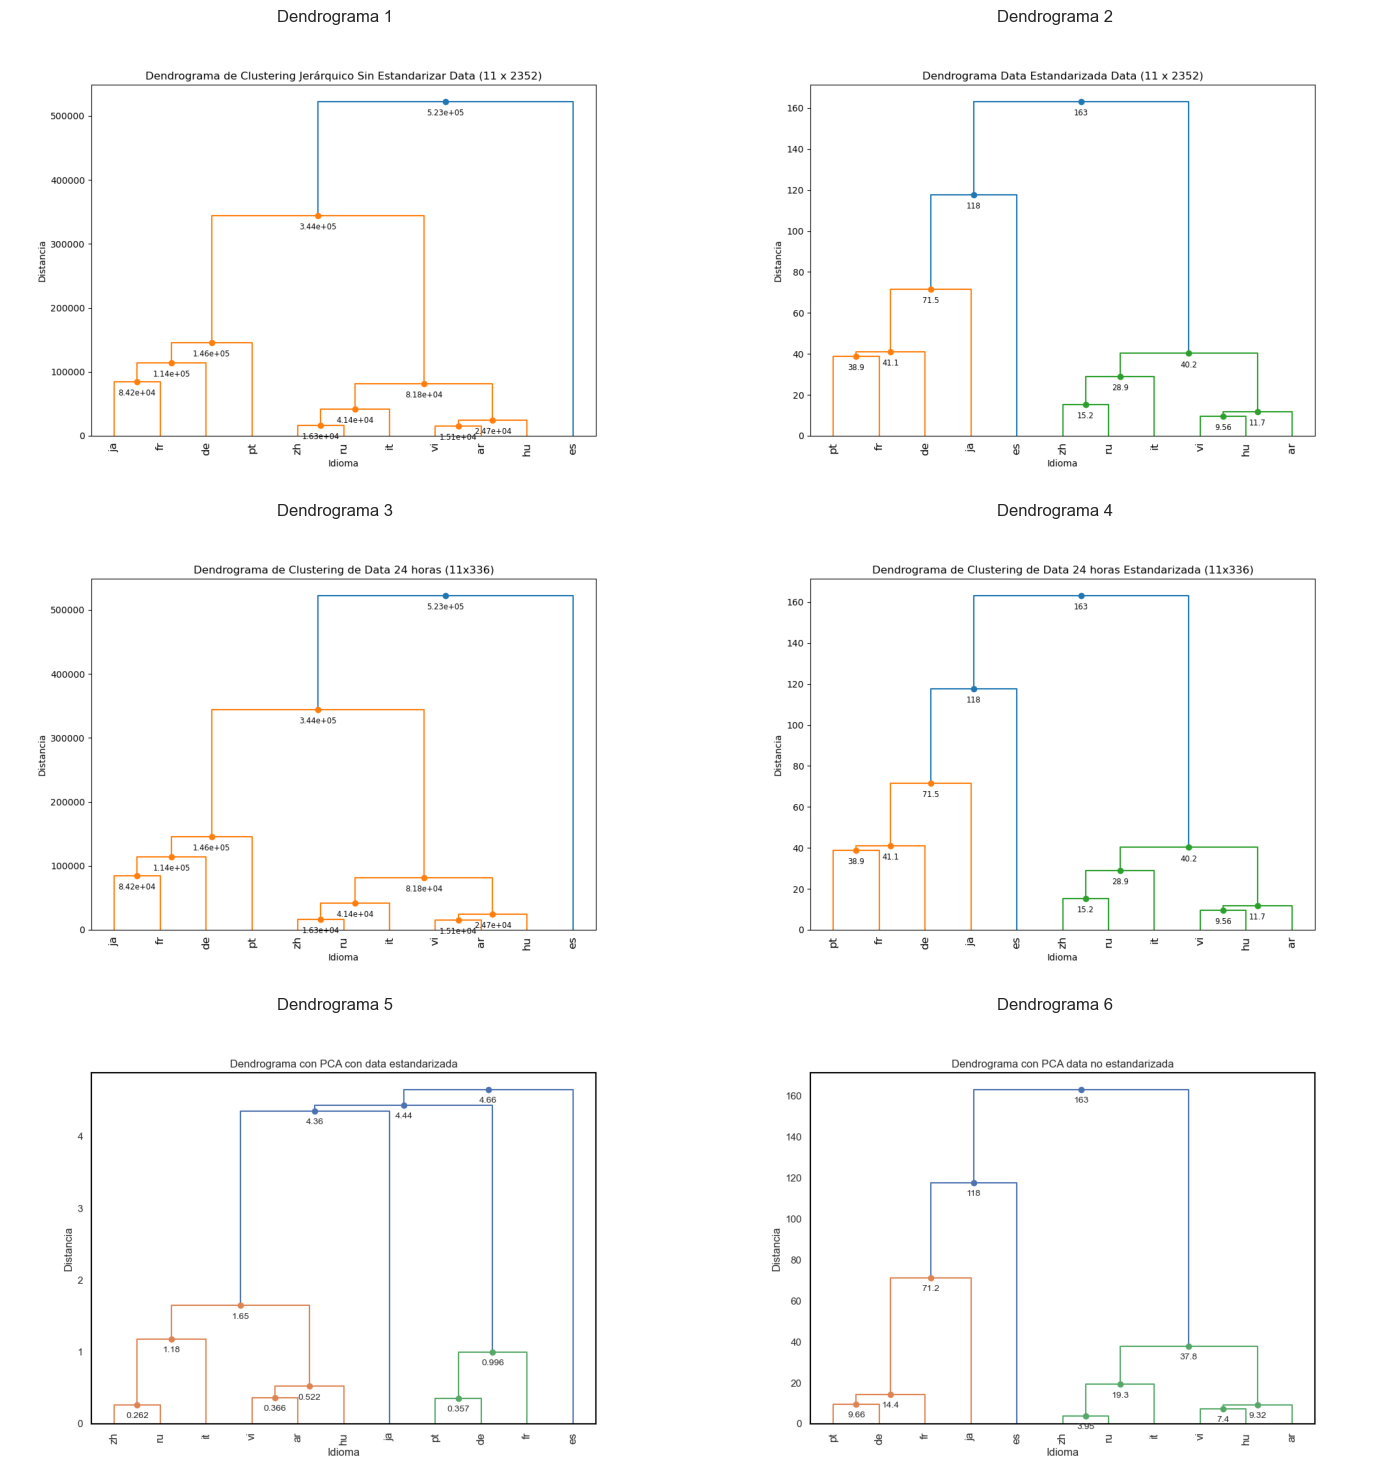

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar las imágenes de los dendrogramas
img1 = mpimg.imread('editores/dendrogram1.png')
img2 = mpimg.imread('editores/dendrogram2.png')
img3 = mpimg.imread('editores/dendrogram3.png')
img4 = mpimg.imread('editores/dendrogram4.png')
img5 = mpimg.imread('editores/dendrogram5.png')
img6 = mpimg.imread('editores/dendrogram6.png')

# Crear un solo plot con 6 cuadrantes (3x2)
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Mostrar las imágenes en cada subplot
axs[0, 0].imshow(img1)
axs[0, 0].axis('off')
axs[0, 0].set_title('Dendrograma 1')

axs[0, 1].imshow(img2)
axs[0, 1].axis('off')
axs[0, 1].set_title('Dendrograma 2')

axs[1, 0].imshow(img3)
axs[1, 0].axis('off')
axs[1, 0].set_title('Dendrograma 3')

axs[1, 1].imshow(img4)
axs[1, 1].axis('off')
axs[1, 1].set_title('Dendrograma 4')

axs[2, 0].imshow(img5)
axs[2, 0].axis('off')
axs[2, 0].set_title('Dendrograma 5')

axs[2, 1].imshow(img6)
axs[2, 1].axis('off')
axs[2, 1].set_title('Dendrograma 6')

plt.tight_layout()
plt.show()

In [46]:
combined_activities

{'art': day_of_week  hour
 0            0       50890
              1       41397
              2       33344
              3       26365
              4       20887
                      ...  
 6            19      69046
              20      68169
              21      67696
              22      66155
              23      60102
 Name: art, Length: 168, dtype: int64,
 'events': day_of_week  hour
 0            0       33461
              1       27012
              2       22033
              3       17574
              4       13883
                      ...  
 6            19      46364
              20      45341
              21      44600
              22      43670
              23      39467
 Name: events, Length: 168, dtype: int64,
 'foods': day_of_week  hour
 0            0       1228
              1       1028
              2        799
              3        578
              4        447
                      ... 
 6            19      1345
              20      1363
    

In [37]:
data_pivot

week_hour    0                                                                 \
category      1      2     3      4      5      6     7      8      9      10   
language                                                                        
ar          7077   4235  1029   6757   3769   7663  1508   8048   4807   7387   
de         62614   8196  1534  24528   1726  45169  1609  13344   2814  33487   
es         41399  38672  3619  26207  10938  70021  3624  25609  45795  32175   
fr         37208  36785  3286  45219  22342  70078  3887  16107  13763  47829   
hu          2134    704    85   2325    277   4074   116   1732    390   1708   
it         21071  21132  4446  16524   9429  14857  1077   8188   5264  10507   
ja         29766   3066  5438  28549  11667  47261  2456  30447   9797  21024   
pt         35928  38511  3136  32433   8185  50234  1539  39327  27860  33506   
ru         14669   7377  2551  12359   2184  19634  1250  22889   3419   9069   
vi          1199   1681   554   2570    983   2268   397   2601   1545   2821   
zh         15933   3873  1117   9922   2828  10020  2622  17472   4209  11554   

week_hour  ...    167                                                         \
category   ...     4      5      6     7      8      9      10     11     12   
language   ...                                                                 
ar         ...   6566   3897   7421  1534   7712   4821   7139   4290   1861   
de         ...  34697   2440  61056  2247  18845   3655  45905  19674  13667   
es         ...  30602  12641  82184  4050  28871  53131  37575  12888  47443   
fr         ...  60704  31957  94049  5384  22000  18508  64306  15994  23829   
hu         ...   4415    483   6778   253   2769    692   2795    924   1029   
it         ...  21493  12112  18590  1338  10506   6677  12882  10646   9977   
ja         ...  32668  13578  54097  3092  34653  10810  23806   6324   5291   
pt         ...  33086   9057  52733  1706  41902  29864  33895  11529   4346   
ru         ...  13929   2581  21246  1346  25381   3619   9927   6595   4451   
vi         ...   3392   1253   3116   568   3434   2304   3765    591    368   
zh         ...  11091   3074  11419  2942  19395   4514  12700   3346   3125   

week_hour         
category      13  
language          
ar          1799  
de         20825  
es         20759  
fr         21352  
hu          1253  
it         12123  
ja         10813  
pt         15931  
ru          4183  
vi           430  
zh          3892  

[11 rows x 2184 columns]

In [65]:
editors_per_hour

week_hour  category
0          1           50890
           2           33461
           3            1228
           4            7568
           5           34219
                       ...  
167        10          36901
           11          44712
           12          21763
           13          30423
           14          21386
Length: 2352, dtype: int64

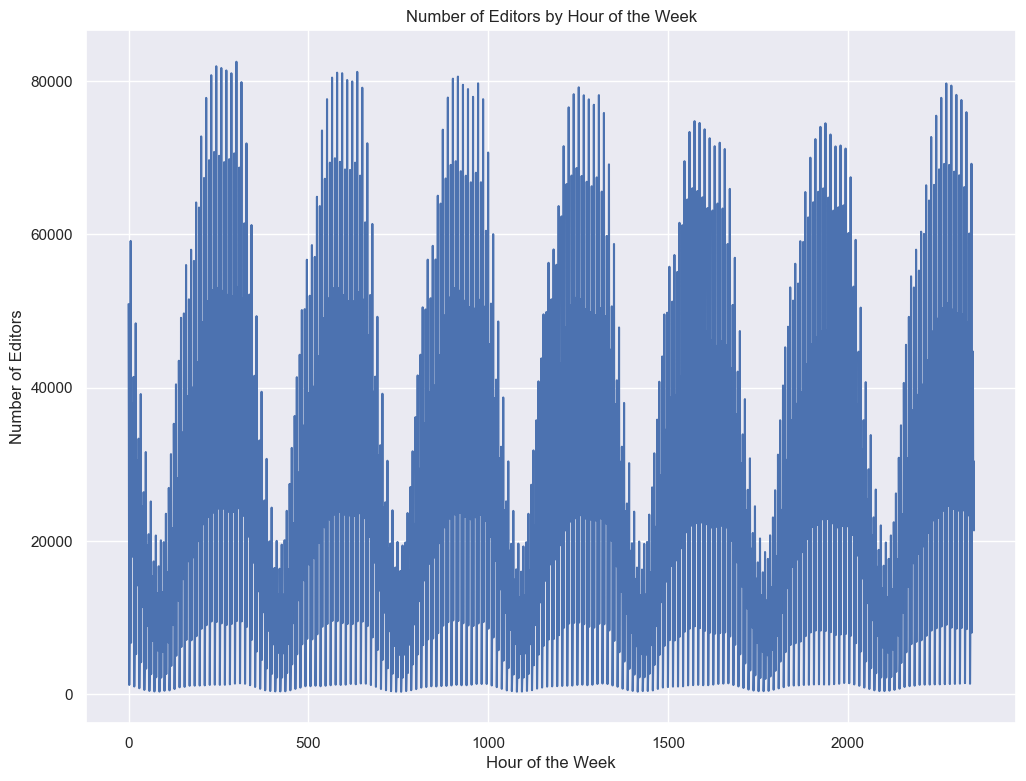

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Asumir que data_pivot ya está definida
# Primero, necesitamos agregar el número de editores por hora de la semana a través de todas las categorías.

# Sumar el número de editores en todas las filas (idiomas) para cada columna (hora de la semana)
editors_per_hour = data_pivot.sum(axis=0)

# Crear el gráfico
plt.figure(figsize=(12, 9))
plt.plot(range(len(editors_per_hour)), editors_per_hour)
plt.xlabel('Hour of the Week')
plt.ylabel('Number of Editors')
plt.title('Number of Editors by Hour of the Week')
plt.show()

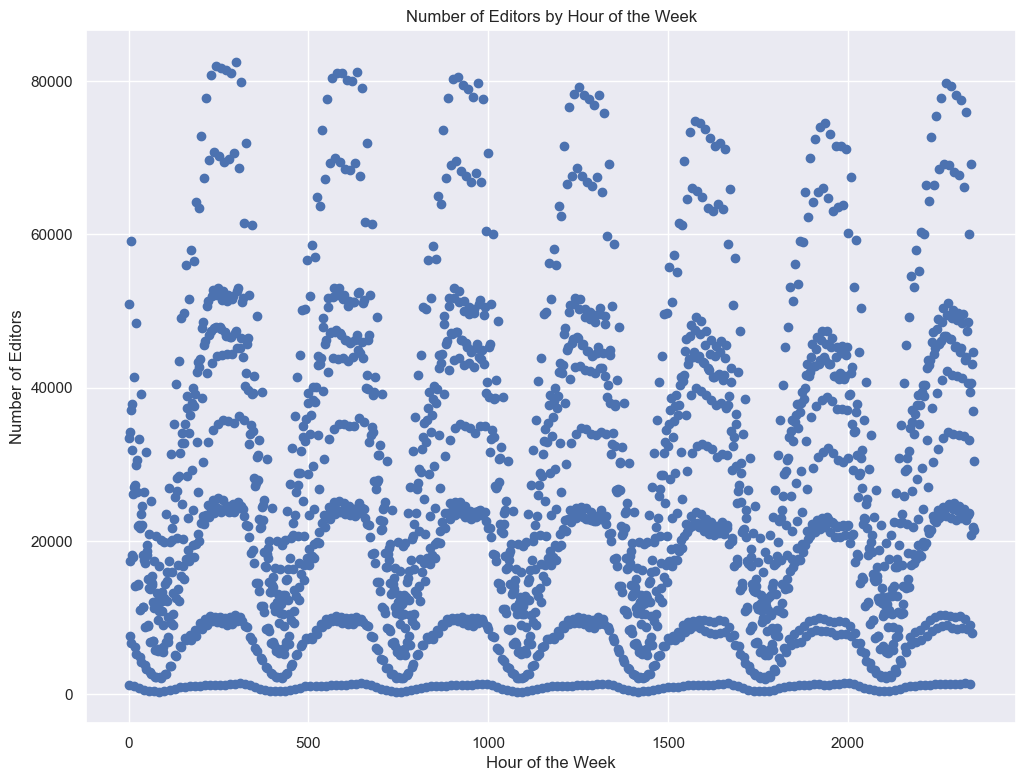

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Crear el gráfico
plt.figure(figsize=(12, 9))
plt.scatter(range(len(editors_per_hour)), editors_per_hour)
plt.xlabel('Hour of the Week')
plt.ylabel('Number of Editors')
plt.title('Number of Editors by Hour of the Week')
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler
# Sk Learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [32]:
data_pivot = pd.DataFrame(editors_per_hour)

In [35]:
data_pivot

0
week_hour category       
0         1         50890
          2         33461
          3          1228
          4          7568
          5         34219
...                   ...
167       10        36901
          11        44712
          12        21763
          13        30423
          14        21386

[2352 rows x 1 columns]

## ESTANDARIZACION PARA PCA

In [38]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data_pivot)
#segmentation_std = data_pivot

In [41]:
from sklearn.decomposition import PCA


# PCA
pca = PCA()
pca.fit(segmentation_std)

# The attribute shows how much variance is explained by each of the seven individual components.
print(pca.explained_variance_ratio_)



[6.36983119e-01 1.40742626e-01 7.03079792e-02 5.90075576e-02
 4.27606524e-02 3.05978317e-02 1.15375679e-02 4.68866751e-03
 2.55080684e-03 8.23191619e-04 6.29923846e-32]


[6.36983119e-01 1.40742626e-01 7.03079792e-02 5.90075576e-02
 4.27606524e-02 3.05978317e-02 1.15375679e-02 4.68866751e-03
 2.55080684e-03 8.23191619e-04 6.29923846e-32]


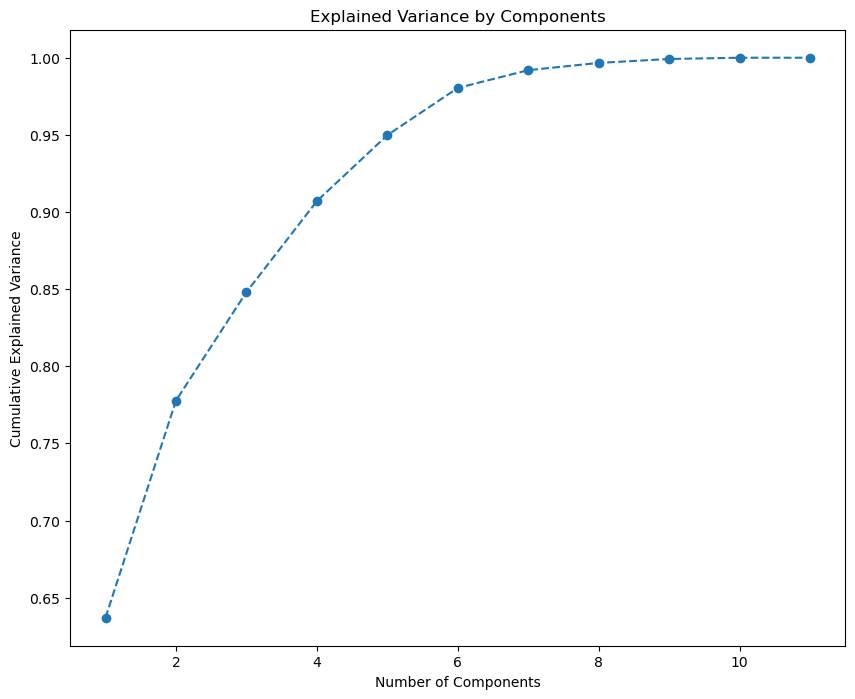

In [42]:
 #The attribute shows how much variance is explained by each of the individual components.
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [43]:
# Elegimos tres componentes. 3 o 4 parece la elección correcta según el gráfico anterior.
pca = PCA(n_components=3)

# Ajustamos el modelo con el número seleccionado de componentes. En nuestro caso, tres.
pca.fit(segmentation_std)



PCA(n_components=3)

In [44]:
scores_pca = pca.transform(segmentation_std)

In [45]:

# Varianza explicada por cada uno de los 3 componentes principales
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Imprimir resultados
print(f"Data Estandarizada EDICIONES:")
print(f"Varianza explicada por cada componente: {explained_variance_ratio}")
print(f"Varianza acumulada: {cumulative_variance}")
print(f"Porcentaje de información retenida: {cumulative_variance[-1] * 100:.2f}%")
print(f"Porcentaje de información perdida: {(1 - cumulative_variance[-1]) * 100:.2f}%")

Data Estandarizada EDICIONES:
Varianza explicada por cada componente: [0.63698312 0.14074263 0.07030798]
Varianza acumulada: [0.63698312 0.77772575 0.84803372]
Porcentaje de información retenida: 84.80%
Porcentaje de información perdida: 15.20%


In [48]:
from sklearn.cluster import KMeans
# K-means clustering con PCA
# Ajustamos K means usando los datos transformados del PCA.
wcss = []
for i in range(1, 12):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

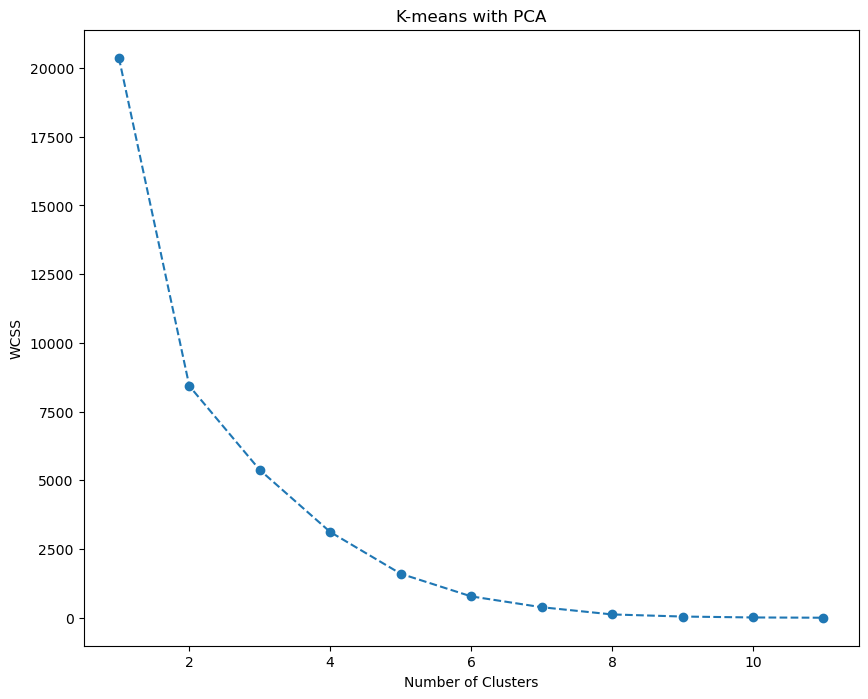

In [49]:
# Graficar el codo para determinar el número óptimo de clusters
plt.figure(figsize=(10, 8))
plt.plot(range(1, 12), wcss, marker='o', linestyle='--')
plt.title('K-means with PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
# Hemos elegido cuatro clusters, por lo que ejecutamos K-means con el número de clusters igual a cuatro.
# Mismo inicializador y estado aleatorio que antes.
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Ajustamos nuestros datos con el modelo k-means pca
kmeans_pca.fit(scores_pca)

/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [51]:
# Creamos un nuevo DataFrame con las características originales y agregamos los puntajes PCA y los clusters asignados.
df_segm_pca_kmeans = pd.concat([data_pivot.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']

# La última columna que agregamos contiene las etiquetas de clustering de k-means con PCA.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

df_segm_pca_kmeans

(0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (0, 6)  (0, 7)  (0, 8)  (0, 9)  \
0     7077    4235    1029    6757    3769    7663    1508    8048    4807   
1    62614    8196    1534   24528    1726   45169    1609   13344    2814   
2    41399   38672    3619   26207   10938   70021    3624   25609   45795   
3    37208   36785    3286   45219   22342   70078    3887   16107   13763   
4     2134     704      85    2325     277    4074     116    1732     390   
5    21071   21132    4446   16524    9429   14857    1077    8188    5264   
6    29766    3066    5438   28549   11667   47261    2456   30447    9797   
7    35928   38511    3136   32433    8185   50234    1539   39327   27860   
8    14669    7377    2551   12359    2184   19634    1250   22889    3419   
9     1199    1681     554    2570     983    2268     397    2601    1545   
10   15933    3873    1117    9922    2828   10020    2622   17472    4209   

    (0, 10)  ...  (167, 8)  (167, 9)  (167, 10)  (167, 11)  (167, 12)  \
0      7387  ...      7712      4821       7139       4290       1861   
1     33487  ...     18845      3655      45905      19674      13667   
2     32175  ...     28871     53131      37575      12888      47443   
3     47829  ...     22000     18508      64306      15994      23829   
4      1708  ...      2769       692       2795        924       1029   
5     10507  ...     10506      6677      12882      10646       9977   
6     21024  ...     34653     10810      23806       6324       5291   
7     33506  ...     41902     29864      33895      11529       4346   
8      9069  ...     25381      3619       9927       6595       4451   
9      2821  ...      3434      2304       3765        591        368   
10    11554  ...     19395      4514      12700       3346       3125   

    (167, 13)  Component 1  Component 2  Component 3  Segment K-means PCA  
0        1799   -34.413307     4.565651    -3.917845                    0  
1       20825    19.828838   -28.833847    31.146504                    2  
2       20759    63.220551    29.622054    -2.115705                    1  
3       21352    64.033832   -27.129112   -19.430257                    3  
4        1253   -41.817302    -2.566060     0.108449                    0  
5       12123    -6.235011   -15.209169   -10.179286                    0  
6       10813     1.632030     5.301305    -3.628421                    0  
7       15931    25.813786    24.810298    12.910531                    1  
8        4183   -22.750368     4.681368     2.285125                    0  
9         430   -45.880349     1.778860    -5.479674                    0  
10       3892   -23.432698     2.978652    -1.699421                    0  

[11 rows x 2188 columns]

In [52]:
# Lista de idiomas (basada en la imagen proporcionada)
languages = ['ar', 'de', 'es', 'fr', 'hu', 'it', 'ja', 'pt', 'ru', 'vi', 'zh']

# Crear un DataFrame de idiomas
languages_df = pd.DataFrame(languages, columns=['language'])

# Asegurar que el índice de languages_df coincida con df_segm_pca_kmeans
languages_df.index = df_segm_pca_kmeans.index

In [53]:
# Combinar los DataFrames
df_combined = pd.concat([languages_df, df_segm_pca_kmeans['Segment K-means PCA']], axis=1)

# Mostrar el nuevo DataFrame
df_combined

language  Segment K-means PCA
0        ar                    0
1        de                    2
2        es                    1
3        fr                    3
4        hu                    0
5        it                    0
6        ja                    0
7        pt                    1
8        ru                    0
9        vi                    0
10       zh                    0

In [54]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({
    0: 'first',
    1: 'second',
    2: 'third',
    3: 'fourth'
})

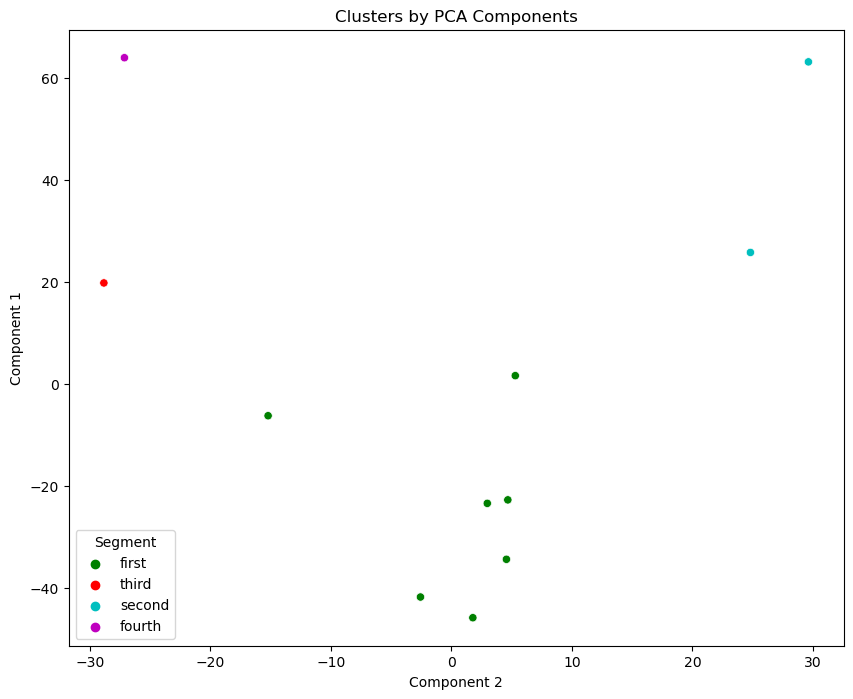

In [56]:
# Graficar datos por componentes PCA. El eje Y es el primer componente, el eje X es el segundo.
import seaborn as sns
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


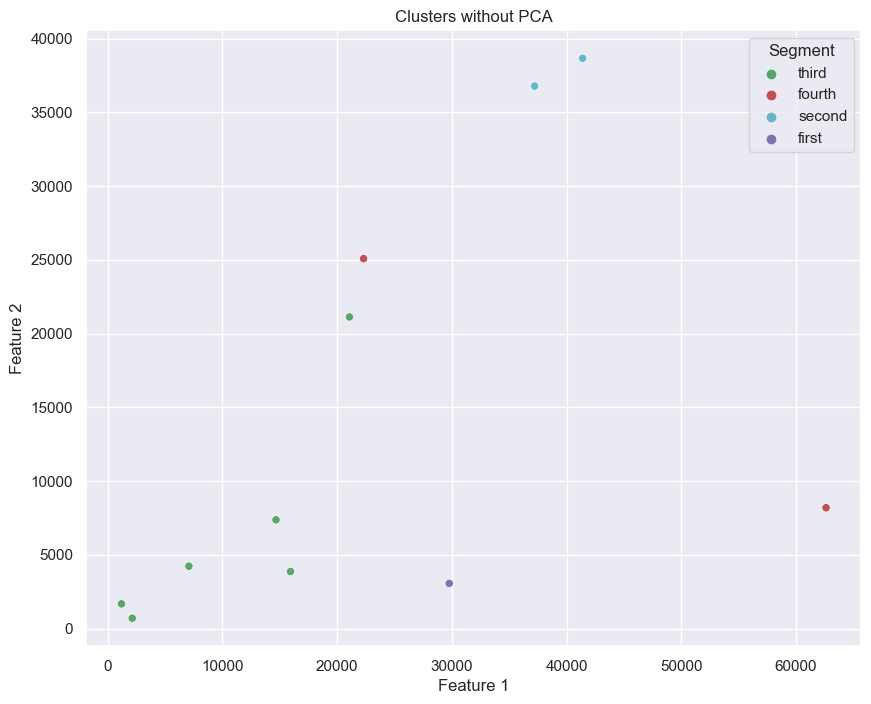

In [40]:
# K-means clustering sin PCA
kmeans_no_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_no_pca.fit(segmentation_std)

# Agregar las etiquetas de clustering al DataFrame original
data_pivot['Segment K-means'] = kmeans_no_pca.labels_

# Asignar etiquetas de texto a los clusters
data_pivot['Segment'] = data_pivot['Segment K-means'].map({
    0: 'first',
    1: 'second',
    2: 'third',
    3: 'fourth'
})

# Graficar los clusters sin PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pivot.iloc[:, 0], y=data_pivot.iloc[:, 1], hue=data_pivot['Segment'], palette=['g', 'r', 'c', 'm'])
plt.title('Clusters without PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [64]:
cluster_sums = data_pivot.groupby('Segment').sum()

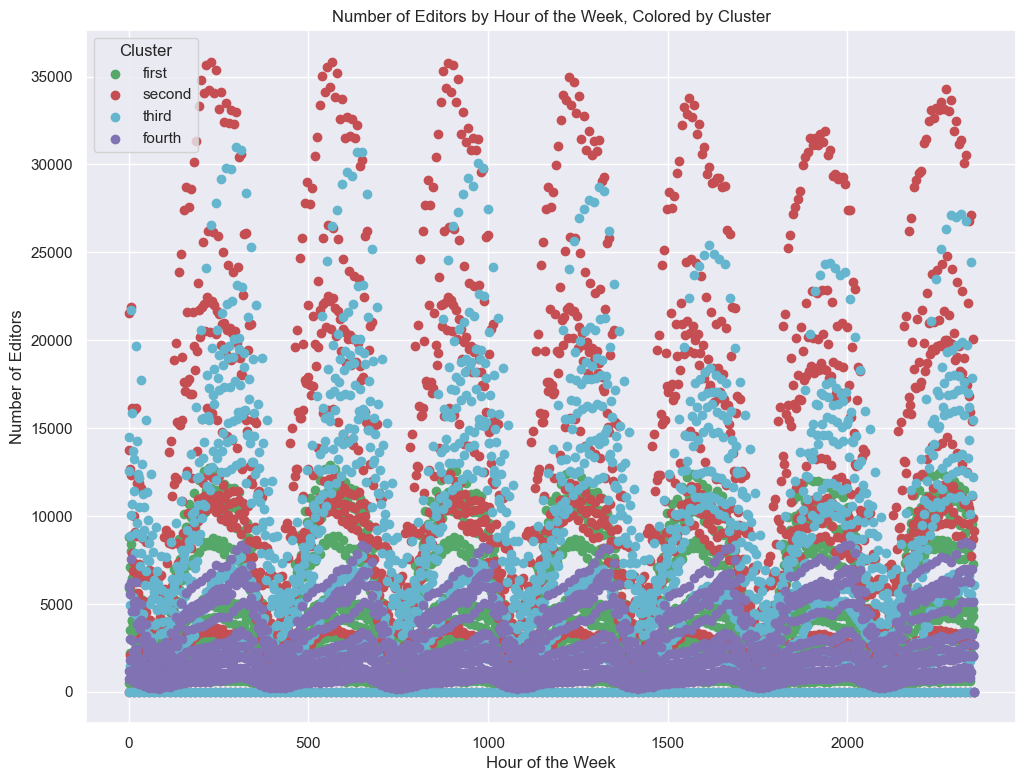

In [65]:
plt.figure(figsize=(12, 9))
colors = {'first': 'g', 'second': 'r', 'third': 'c', 'fourth': 'm'}

for segment, color in colors.items():
    plt.scatter(range(cluster_sums.shape[1]), cluster_sums.loc[segment], label=segment, color=color)

plt.xlabel('Hour of the Week')
plt.ylabel('Number of Editors')
plt.title('Number of Editors by Hour of the Week, Colored by Cluster')
plt.legend(title='Cluster')
plt.show()

In [57]:
import pandas as pd

# Lista de idiomas (basada en la imagen proporcionada)
languages = ['ar', 'de', 'es', 'fr', 'hu', 'it', 'ja', 'pt', 'ru', 'vi', 'zh']

# Crear un DataFrame de idiomas
languages_df = pd.DataFrame(languages, columns=['language'])

# Asegurar que el índice de languages_df coincida con df_segm_pca_kmeans
languages_df.index = df_segm_pca_kmeans.index

# Combinar los DataFrames
df_combined = pd.concat([languages_df, df_segm_pca_kmeans[['Component 1', 'Component 2', 'Component 3']]], axis=1)

# Establecer los idiomas como índice
df_combined.set_index('language', inplace=True)

# Mostrar el nuevo DataFrame
print(df_combined)

          Component 1  Component 2  Component 3
language                                       
ar         -34.413307     4.565651    -3.917845
de          19.828838   -28.833847    31.146504
es          63.220551    29.622054    -2.115705
fr          64.033832   -27.129112   -19.430257
hu         -41.817302    -2.566060     0.108449
it          -6.235011   -15.209169   -10.179286
ja           1.632030     5.301305    -3.628421
pt          25.813786    24.810298    12.910531
ru         -22.750368     4.681368     2.285125
vi         -45.880349     1.778860    -5.479674
zh         -23.432698     2.978652    -1.699421


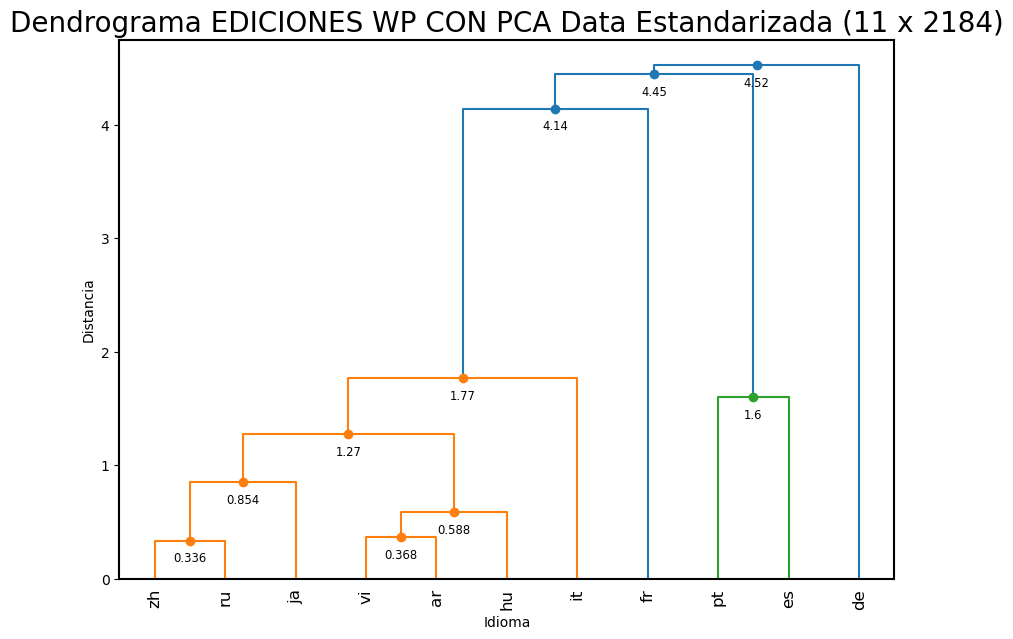

In [58]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Normalizar los datos utilizando z-score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_combined)

# Realizar la clusterización jerárquica
linked = linkage(data_scaled, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = data_pivot.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma EDICIONES WP CON PCA Data Estandarizada (11 x 2184)',fontsize=20)
plt.grid(False)
plt.gca().set_facecolor('white')
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
ax = plt.gca()
ax.set_facecolor('white')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# Mostrar el gráfico
plt.savefig('ediciones/dendrogram4.png')
plt.show()


## PCA SIN ESTANDARIZAR

In [68]:
data_pivot

week_hour    0                                                                 \
category      1      2     3      4      5      6     7      8      9      10   
language                                                                        
ar          7077   4235  1029   6757   3769   7663  1508   8048   4807   7387   
de         62614   8196  1534  24528   1726  45169  1609  13344   2814  33487   
es         41399  38672  3619  26207  10938  70021  3624  25609  45795  32175   
fr         37208  36785  3286  45219  22342  70078  3887  16107  13763  47829   
hu          2134    704    85   2325    277   4074   116   1732    390   1708   
it         21071  21132  4446  16524   9429  14857  1077   8188   5264  10507   
ja         29766   3066  5438  28549  11667  47261  2456  30447   9797  21024   
pt         35928  38511  3136  32433   8185  50234  1539  39327  27860  33506   
ru         14669   7377  2551  12359   2184  19634  1250  22889   3419   9069   
vi          1199   1681   554   2570    983   2268   397   2601   1545   2821   
zh         15933   3873  1117   9922   2828  10020  2622  17472   4209  11554   

week_hour  ...    167                                                         \
category   ...     4      5      6     7      8      9      10     11     12   
language   ...                                                                 
ar         ...   6566   3897   7421  1534   7712   4821   7139   4290   1861   
de         ...  34697   2440  61056  2247  18845   3655  45905  19674  13667   
es         ...  30602  12641  82184  4050  28871  53131  37575  12888  47443   
fr         ...  60704  31957  94049  5384  22000  18508  64306  15994  23829   
hu         ...   4415    483   6778   253   2769    692   2795    924   1029   
it         ...  21493  12112  18590  1338  10506   6677  12882  10646   9977   
ja         ...  32668  13578  54097  3092  34653  10810  23806   6324   5291   
pt         ...  33086   9057  52733  1706  41902  29864  33895  11529   4346   
ru         ...  13929   2581  21246  1346  25381   3619   9927   6595   4451   
vi         ...   3392   1253   3116   568   3434   2304   3765    591    368   
zh         ...  11091   3074  11419  2942  19395   4514  12700   3346   3125   

week_hour         
category      13  
language          
ar          1799  
de         20825  
es         20759  
fr         21352  
hu          1253  
it         12123  
ja         10813  
pt         15931  
ru          4183  
vi           430  
zh          3892  

[11 rows x 2184 columns]

In [20]:
data_pivot=df = data_pivot.drop(columns=['Segment K-means', 'Segment'])

KeyError: 'Segment K-means'

In [69]:
segmentation_std = data_pivot

In [70]:

# PCA
pca = PCA()
pca.fit(segmentation_std)

# The attribute shows how much variance is explained by each of the seven individual components.
print(pca.explained_variance_ratio_)


[7.50355130e-01 1.22287584e-01 5.88995216e-02 3.54141893e-02
 2.11590421e-02 6.37338731e-03 2.60894377e-03 2.05074172e-03
 6.50367650e-04 2.01092919e-04 4.47552906e-32]


[7.50355130e-01 1.22287584e-01 5.88995216e-02 3.54141893e-02
 2.11590421e-02 6.37338731e-03 2.60894377e-03 2.05074172e-03
 6.50367650e-04 2.01092919e-04 4.47552906e-32]


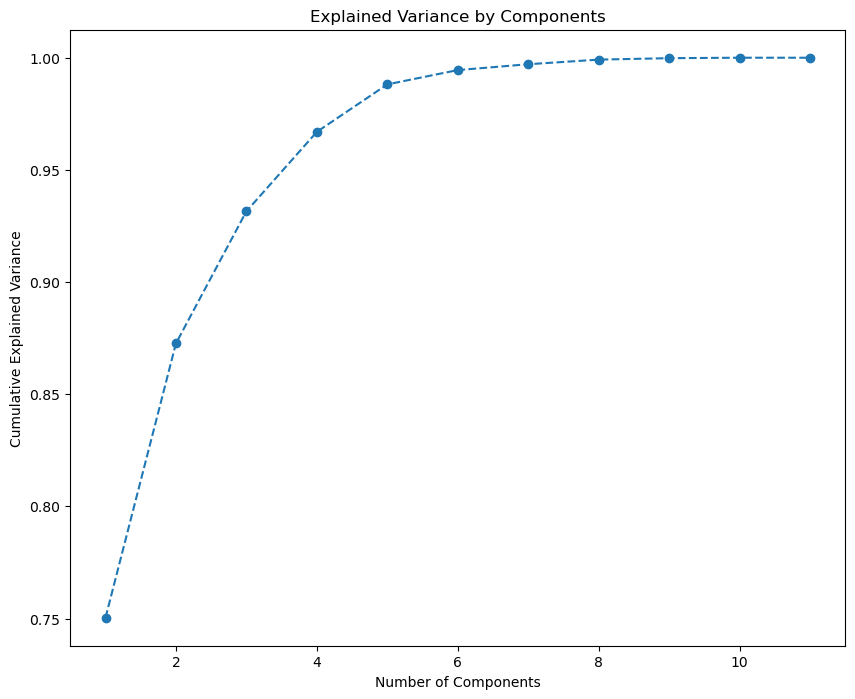

In [71]:
 #The attribute shows how much variance is explained by each of the individual components.
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [72]:
# Elegimos tres componentes. 3 o 4 parece la elección correcta según el gráfico anterior.
pca = PCA(n_components=3)

# Ajustamos el modelo con el número seleccionado de componentes. En nuestro caso, tres.
pca.fit(segmentation_std)

PCA(n_components=3)

In [73]:

# Varianza explicada por cada uno de los 3 componentes principales
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Imprimir resultados
print(f"Data NO Estandarizada EDICIONES:")
print(f"Varianza explicada por cada componente: {explained_variance_ratio}")
print(f"Varianza acumulada: {cumulative_variance}")
print(f"Porcentaje de información retenida: {cumulative_variance[-1] * 100:.2f}%")
print(f"Porcentaje de información perdida: {(1 - cumulative_variance[-1]) * 100:.2f}%")

Data NO Estandarizada EDICIONES:
Varianza explicada por cada componente: [0.75035513 0.12228758 0.05889952]
Varianza acumulada: [0.75035513 0.87264271 0.93154224]
Porcentaje de información retenida: 93.15%
Porcentaje de información perdida: 6.85%


In [74]:
# Creamos un nuevo DataFrame con las características originales y agregamos los puntajes PCA y los clusters asignados.
df_segm_pca_kmeans = pd.concat([data_pivot.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']

# La última columna que agregamos contiene las etiquetas de clustering de k-means con PCA.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

df_segm_pca_kmeans

(0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (0, 6)  (0, 7)  (0, 8)  (0, 9)  \
0     7077    4235    1029    6757    3769    7663    1508    8048    4807   
1    62614    8196    1534   24528    1726   45169    1609   13344    2814   
2    41399   38672    3619   26207   10938   70021    3624   25609   45795   
3    37208   36785    3286   45219   22342   70078    3887   16107   13763   
4     2134     704      85    2325     277    4074     116    1732     390   
5    21071   21132    4446   16524    9429   14857    1077    8188    5264   
6    29766    3066    5438   28549   11667   47261    2456   30447    9797   
7    35928   38511    3136   32433    8185   50234    1539   39327   27860   
8    14669    7377    2551   12359    2184   19634    1250   22889    3419   
9     1199    1681     554    2570     983    2268     397    2601    1545   
10   15933    3873    1117    9922    2828   10020    2622   17472    4209   

    (0, 10)  ...  (167, 8)  (167, 9)  (167, 10)  (167, 11)  (167, 12)  \
0      7387  ...      7712      4821       7139       4290       1861   
1     33487  ...     18845      3655      45905      19674      13667   
2     32175  ...     28871     53131      37575      12888      47443   
3     47829  ...     22000     18508      64306      15994      23829   
4      1708  ...      2769       692       2795        924       1029   
5     10507  ...     10506      6677      12882      10646       9977   
6     21024  ...     34653     10810      23806       6324       5291   
7     33506  ...     41902     29864      33895      11529       4346   
8      9069  ...     25381      3619       9927       6595       4451   
9      2821  ...      3434      2304       3765        591        368   
10    11554  ...     19395      4514      12700       3346       3125   

    (167, 13)  Component 1  Component 2  Component 3  Segment K-means PCA  
0        1799   -34.413307     4.565651    -3.917845                    0  
1       20825    19.828838   -28.833847    31.146504                    2  
2       20759    63.220551    29.622054    -2.115705                    1  
3       21352    64.033832   -27.129112   -19.430257                    3  
4        1253   -41.817302    -2.566060     0.108449                    0  
5       12123    -6.235011   -15.209169   -10.179286                    0  
6       10813     1.632030     5.301305    -3.628421                    0  
7       15931    25.813786    24.810298    12.910531                    1  
8        4183   -22.750368     4.681368     2.285125                    0  
9         430   -45.880349     1.778860    -5.479674                    0  
10       3892   -23.432698     2.978652    -1.699421                    0  

[11 rows x 2188 columns]

In [75]:
import pandas as pd

# Lista de idiomas (basada en la imagen proporcionada)
languages = ['ar', 'de', 'es', 'fr', 'hu', 'it', 'ja', 'pt', 'ru', 'vi', 'zh']

# Crear un DataFrame de idiomas
languages_df = pd.DataFrame(languages, columns=['language'])

# Asegurar que el índice de languages_df coincida con df_segm_pca_kmeans
languages_df.index = df_segm_pca_kmeans.index

# Combinar los DataFrames
df_combined = pd.concat([languages_df, df_segm_pca_kmeans[['Component 1', 'Component 2', 'Component 3']]], axis=1)

# Establecer los idiomas como índice
df_combined.set_index('language', inplace=True)

# Mostrar el nuevo DataFrame
print(df_combined)

          Component 1  Component 2  Component 3
language                                       
ar         -34.413307     4.565651    -3.917845
de          19.828838   -28.833847    31.146504
es          63.220551    29.622054    -2.115705
fr          64.033832   -27.129112   -19.430257
hu         -41.817302    -2.566060     0.108449
it          -6.235011   -15.209169   -10.179286
ja           1.632030     5.301305    -3.628421
pt          25.813786    24.810298    12.910531
ru         -22.750368     4.681368     2.285125
vi         -45.880349     1.778860    -5.479674
zh         -23.432698     2.978652    -1.699421


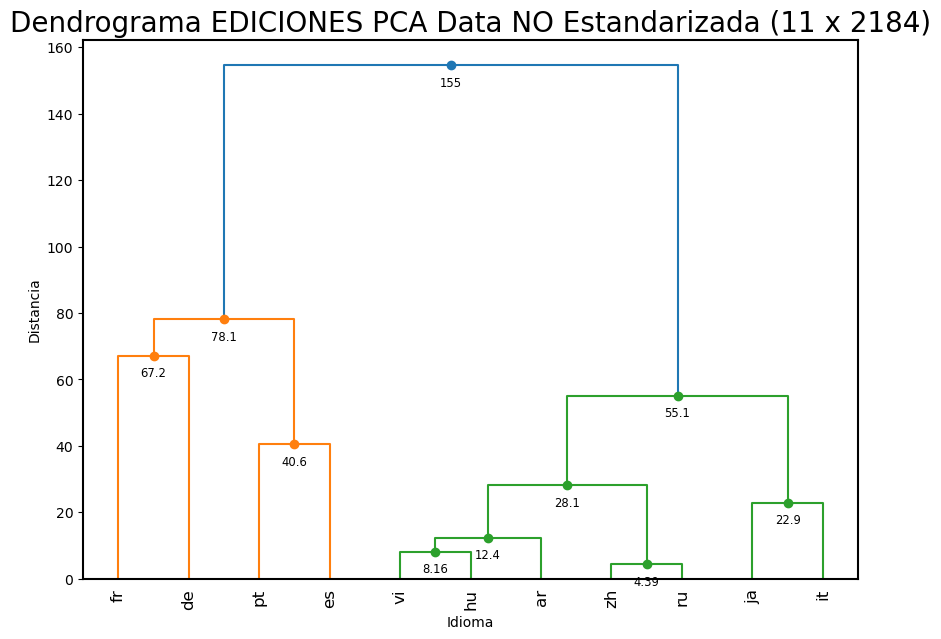

In [76]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Normalizar los datos utilizando z-score
data_scaled = df_combined

# Realizar la clusterización jerárquica
linked = linkage(data_scaled, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = data_pivot.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma EDICIONES PCA Data NO Estandarizada (11 x 2184)',fontsize=20)
plt.grid(False)
plt.gca().set_facecolor('white')
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
ax = plt.gca()
ax.set_facecolor('white')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# Mostrar el gráfico
plt.savefig('ediciones/dendrogram3.png')
plt.show()


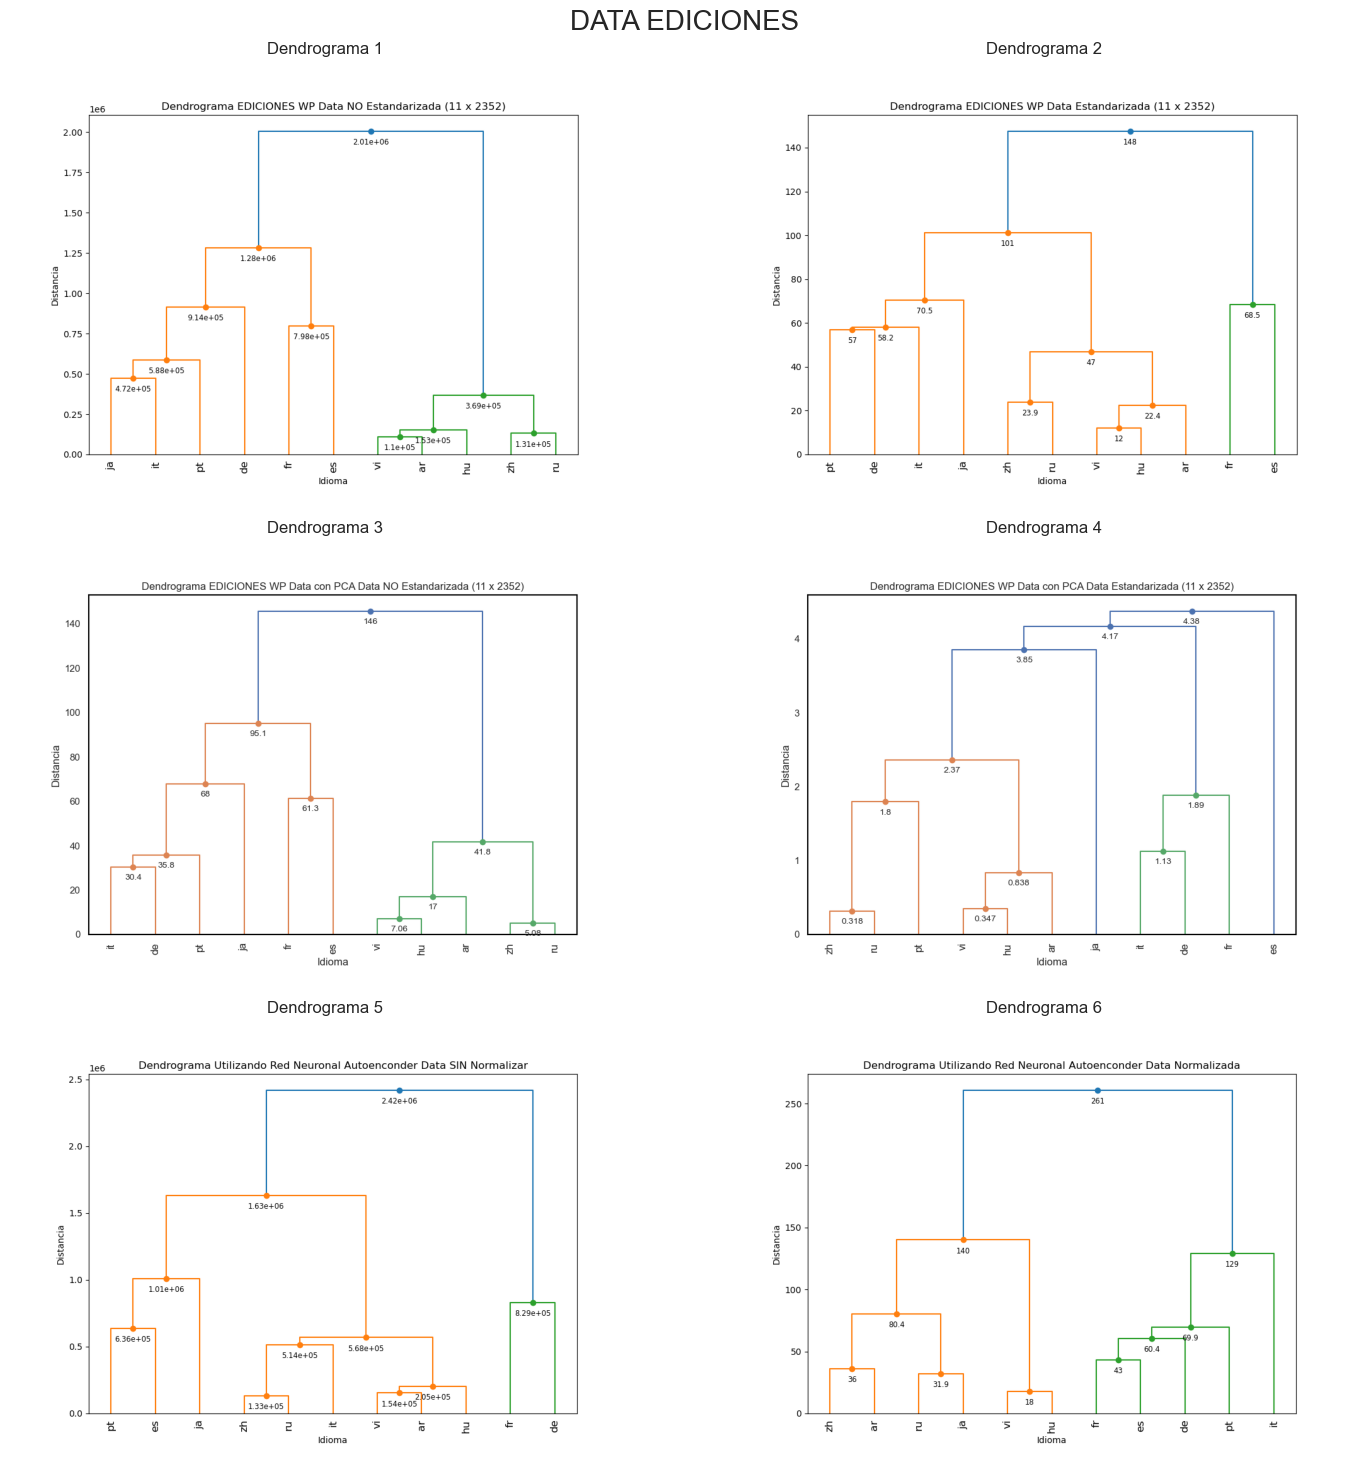

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar las imágenes de los dendrogramas
img1 = mpimg.imread('ediciones/dendrogram1.png')
img2 = mpimg.imread('ediciones/dendrogram2.png')
img3 = mpimg.imread('ediciones/dendrogram3.png')
img4 = mpimg.imread('ediciones/dendrogram4.png')
img5 = mpimg.imread('ediciones/dendrogram7.png')
img6 = mpimg.imread('ediciones/dendrogram8.png')

# Crear un solo plot con 6 cuadrantes (3x2)
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('DATA EDICIONES', fontsize=20)

# Mostrar las imágenes en cada subplot
axs[0, 0].imshow(img1)
axs[0, 0].axis('off')
axs[0, 0].set_title('Dendrograma 1')

axs[0, 1].imshow(img2)
axs[0, 1].axis('off')
axs[0, 1].set_title('Dendrograma 2')

axs[1, 0].imshow(img3)
axs[1, 0].axis('off')
axs[1, 0].set_title('Dendrograma 3')

axs[1, 1].imshow(img4)
axs[1, 1].axis('off')
axs[1, 1].set_title('Dendrograma 4')

axs[2, 0].imshow(img6)
axs[2, 0].axis('off')
axs[2, 0].set_title('Dendrograma 5')

axs[2, 1].imshow(img5)
axs[2, 1].axis('off')
axs[2, 1].set_title('Dendrograma 6')

plt.tight_layout()
plt.show()

In [69]:
import numpy as np
from sklearn.decomposition import PCA

# Fijar la semilla para reproducibilidad
np.random.seed(0)

# Generar datos aleatorios
data = np.random.rand(11, 2352)

# Crear el modelo PCA especificando el número de componentes
pca = PCA(n_components=3)

# Ajustar PCA a los datos
pca.fit(data)

# Varianza explicada por cada uno de los 3 componentes principales
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Imprimir resultados
print(f"Varianza explicada por cada componente: {explained_variance_ratio}")
print(f"Varianza acumulada: {cumulative_variance}")
print(f"Porcentaje de información retenida: {cumulative_variance[-1] * 100:.2f}%")
print(f"Porcentaje de información perdida: {(1 - cumulative_variance[-1]) * 100:.2f}%")

Varianza explicada por cada componente: [0.11068654 0.10922586 0.10664739]
Varianza acumulada: [0.11068654 0.2199124  0.32655979]
Porcentaje de información retenida: 32.66%
Porcentaje de información perdida: 67.34%
